# Experiment 02: Influence of weight coefficients

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

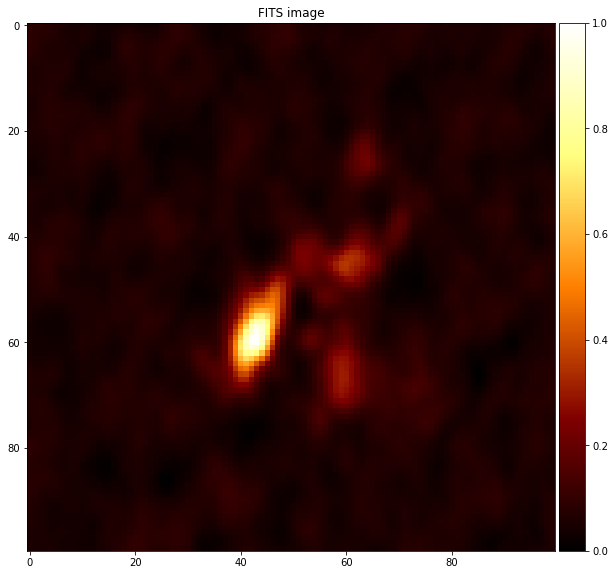

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

## `Case 1 `:   $\alpha_1 \in [0,10]$

In [5]:
elm_list = list()
alpha1 = np.arange(0.,10.1,0.25)

for a1 in alpha1:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 300
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*Nc)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=a1, lamb1=1., b=0., lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

##########################################################################################
Processing example with alpha1: 0.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.00424334205943393
Residual Variance: 1.7806017724592886e-05
Flux Lost: 0.008175659960295881
Flux Addition: 0.006082999619764495
psi1(u-f): 0.0005603215867679048
Exceeded Pixels: 441
Sharpness: 3.807504495613948
psi2(grad u): 0.024909865700774095
Total elapsed time: 509.2249994277954 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0647170803654014
Mean min distance between collocation an

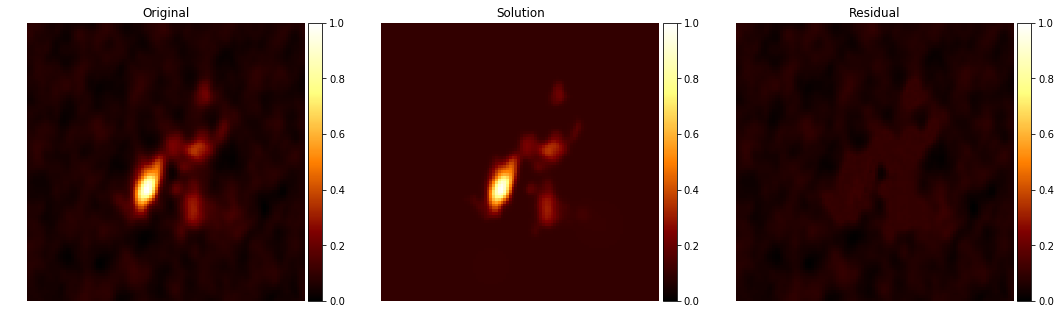

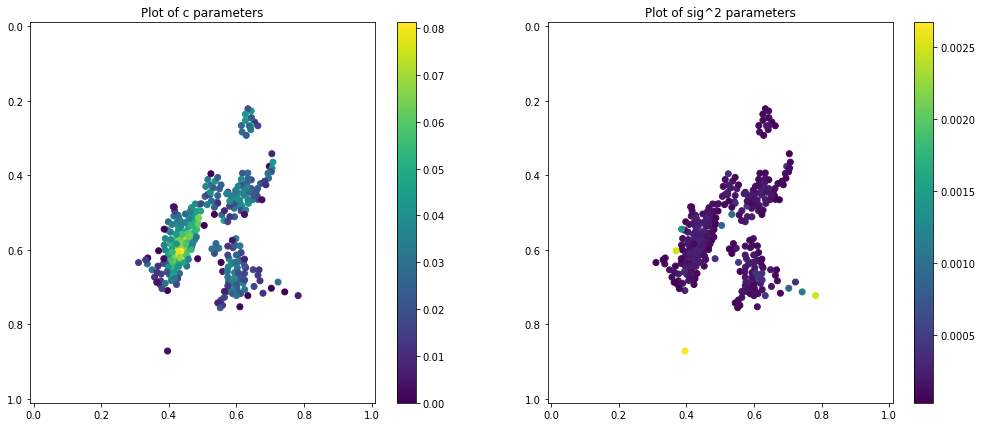

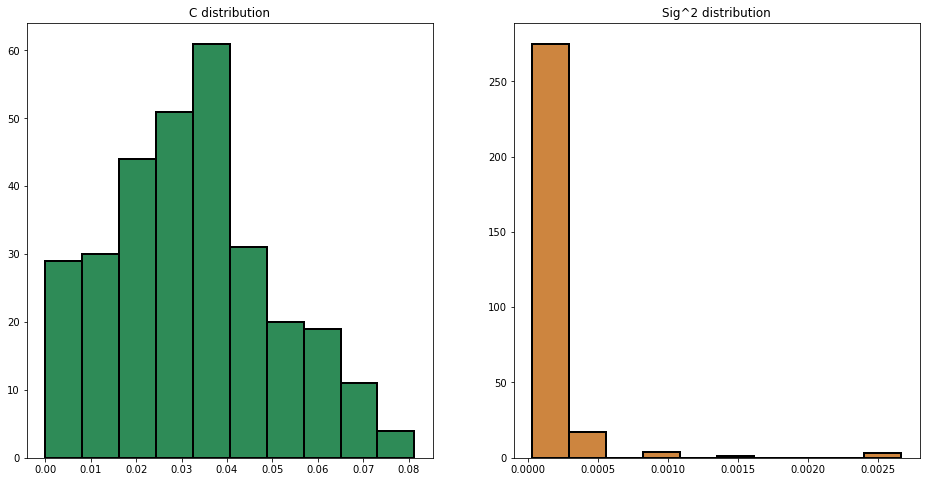

##########################################################################################
Processing example with alpha1: 0.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.004366805646087616
Residual Variance: 1.8844971860503377e-05
Flux Lost: 0.008437014129970642
Flux Addition: 0.006221888335377458
psi1(u-f): 0.0006042816396022925
Exceeded Pixels: 427
Sharpness: 3.8038492418911036
psi2(grad u): 0.024860205588267983
Total elapsed time: 496.15086460113525 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06508971996714437
Mean min distance between collocati

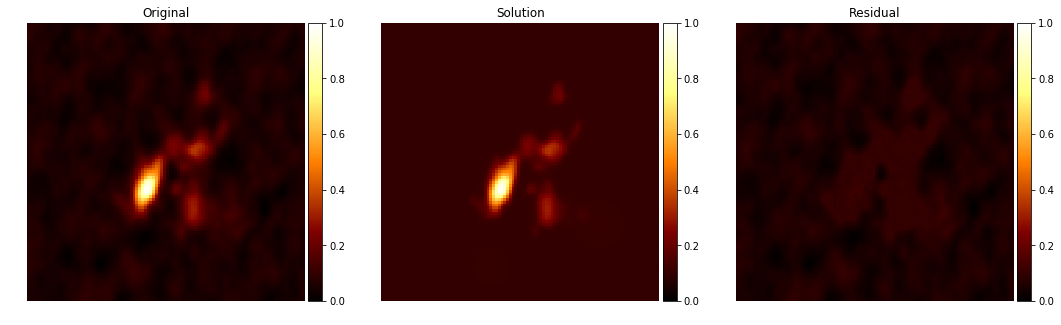

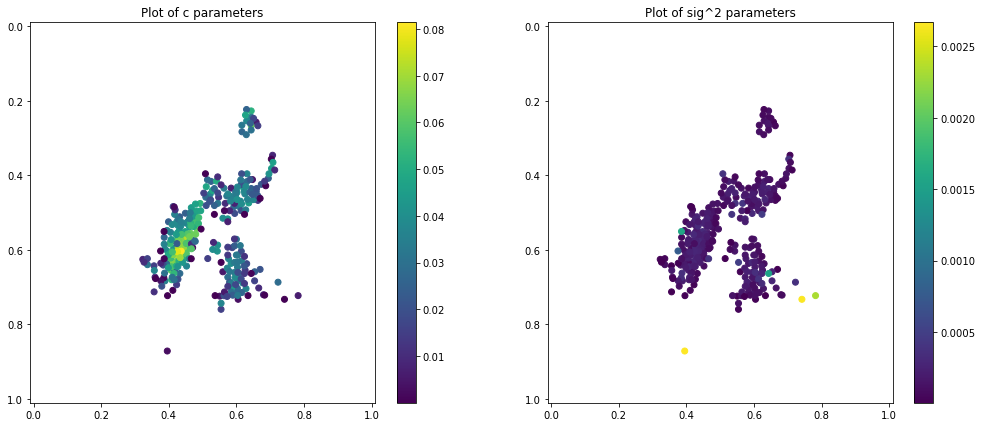

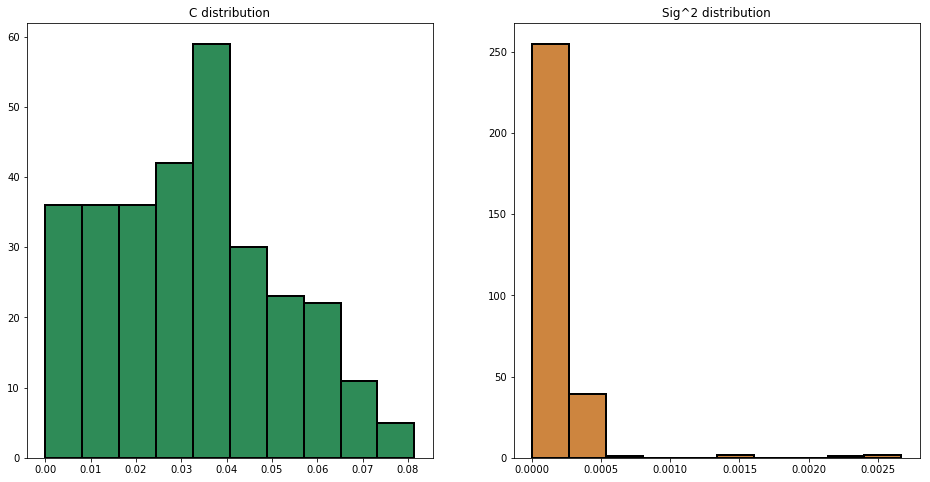

##########################################################################################
Processing example with alpha1: 0.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004335040520523503
Residual Variance: 1.853086641177836e-05
Flux Lost: 0.008499264006038206
Flux Addition: 0.006105036718205642
psi1(u-f): 0.000570784988658182
Exceeded Pixels: 442
Sharpness: 3.805485728167062
psi2(grad u): 0.02489586848194991
Total elapsed time: 510.6964077949524 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06438236505460801
Mean min distance between collocation and

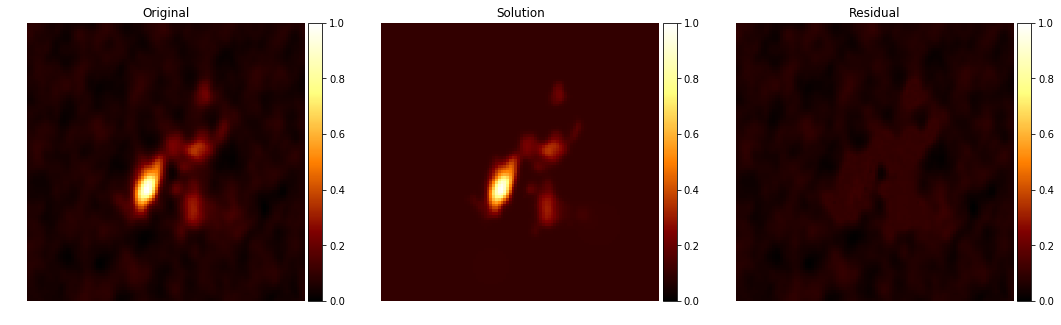

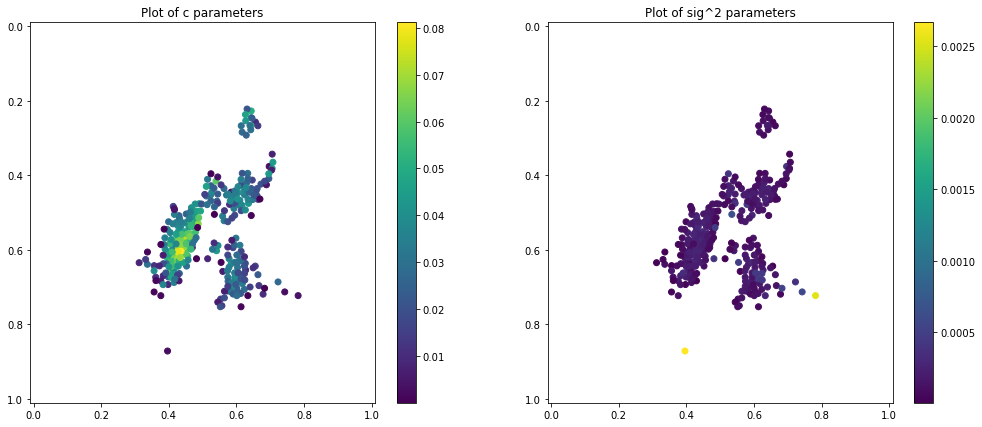

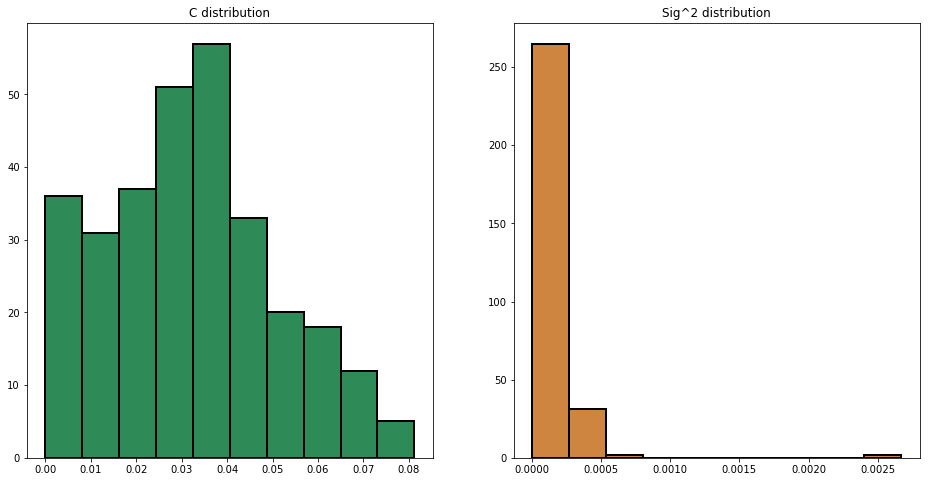

##########################################################################################
Processing example with alpha1: 0.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.004346924586159599
Residual Variance: 1.8604635816461628e-05
Flux Lost: 0.008577071255992776
Flux Addition: 0.00605190785854924
psi1(u-f): 0.0005665139225800883
Exceeded Pixels: 438
Sharpness: 3.8051190674191813
psi2(grad u): 0.02489597163370261
Total elapsed time: 503.1245012283325 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06503103083587536
Mean min distance between collocation 

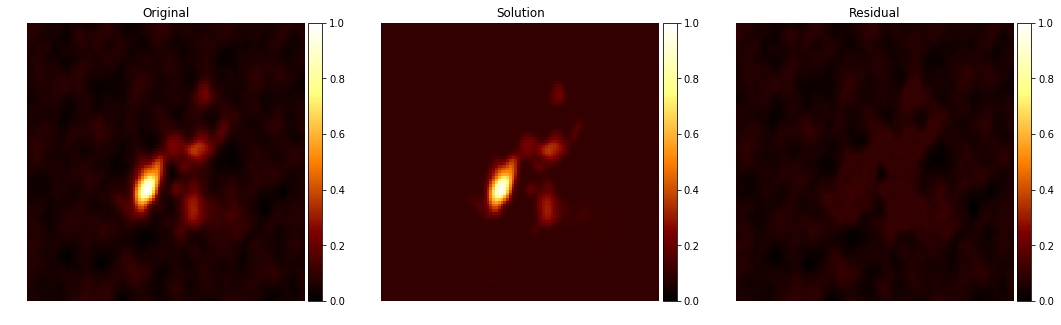

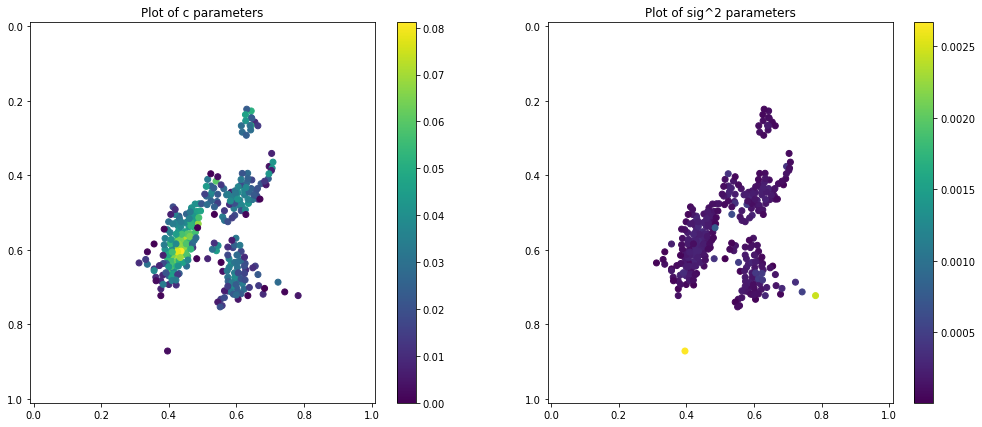

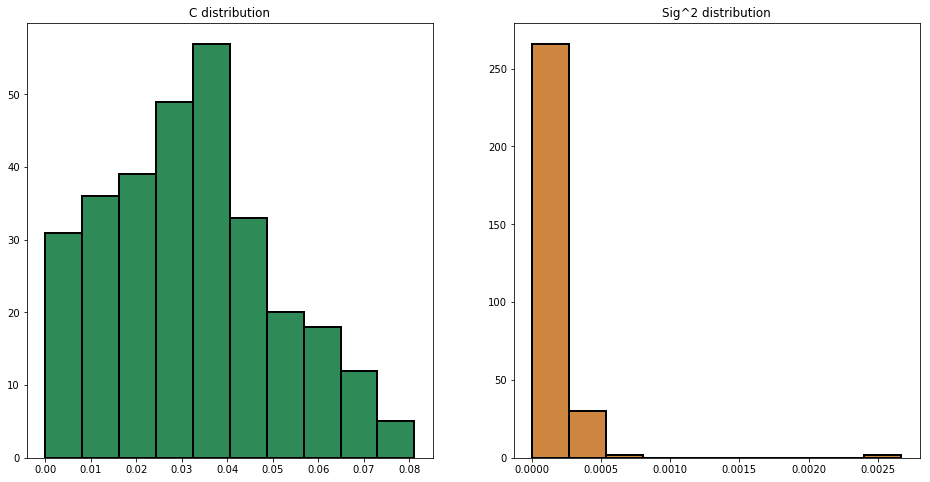

##########################################################################################
Processing example with alpha1: 1.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004304762981837467
Residual Variance: 1.820095089110827e-05
Flux Lost: 0.008569553441534582
Flux Addition: 0.0058809034438655535
psi1(u-f): 0.0005026333310064147
Exceeded Pixels: 437
Sharpness: 3.8075030914453194
psi2(grad u): 0.02491499942969609
Total elapsed time: 512.239716053009 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0654455448921762
Mean min distance between collocation an

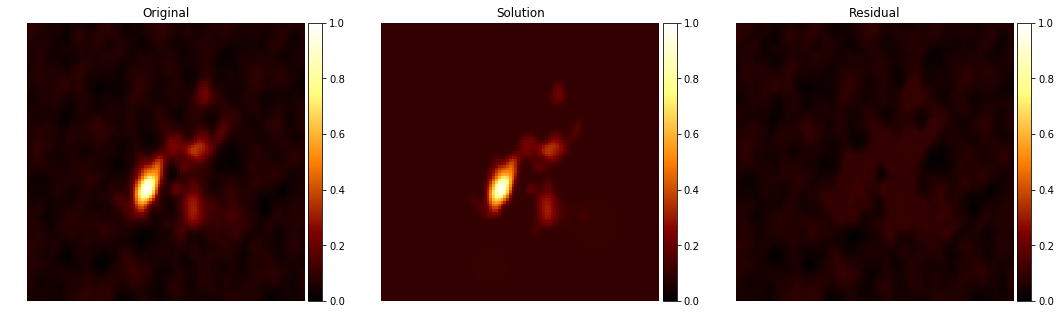

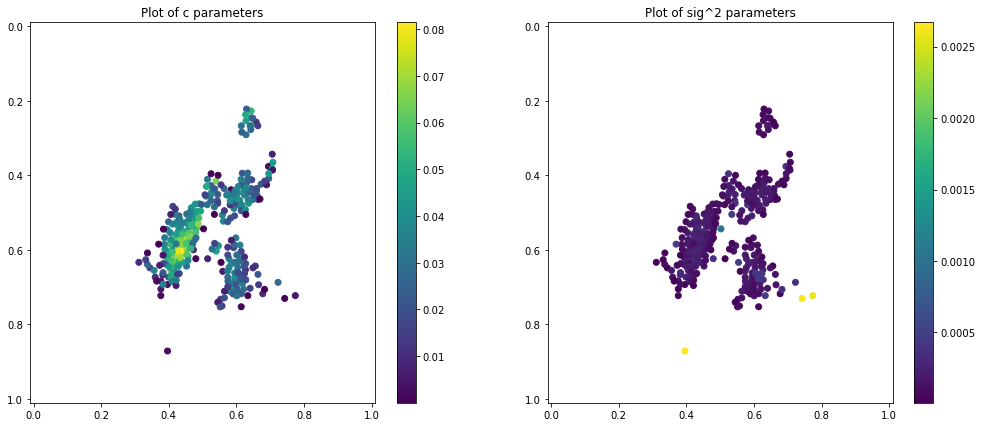

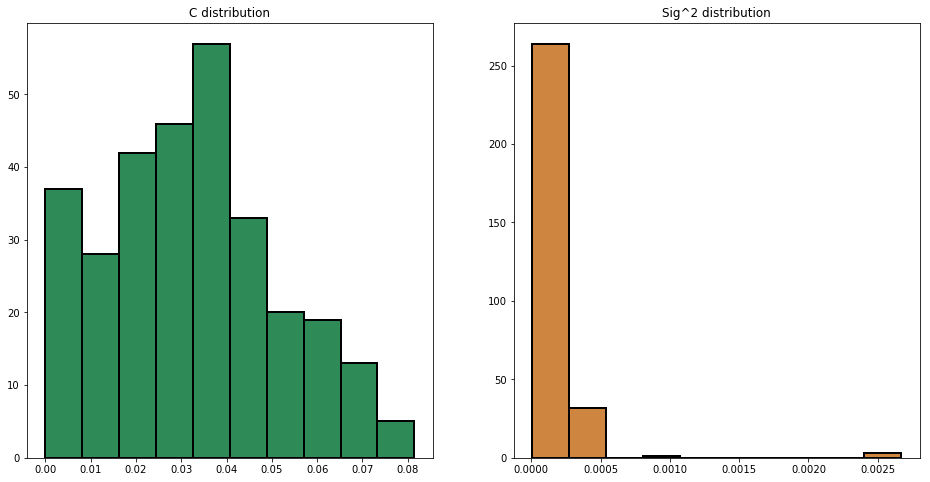

##########################################################################################
Processing example with alpha1: 1.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004302023581912102
Residual Variance: 1.8114034762346484e-05
Flux Lost: 0.008703196390814712
Flux Addition: 0.005767865292264779
psi1(u-f): 0.00046628786733181294
Exceeded Pixels: 426
Sharpness: 3.81102538155244
psi2(grad u): 0.02481486923975939
Total elapsed time: 509.9236831665039 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06570264543637763
Mean min distance between collocation 

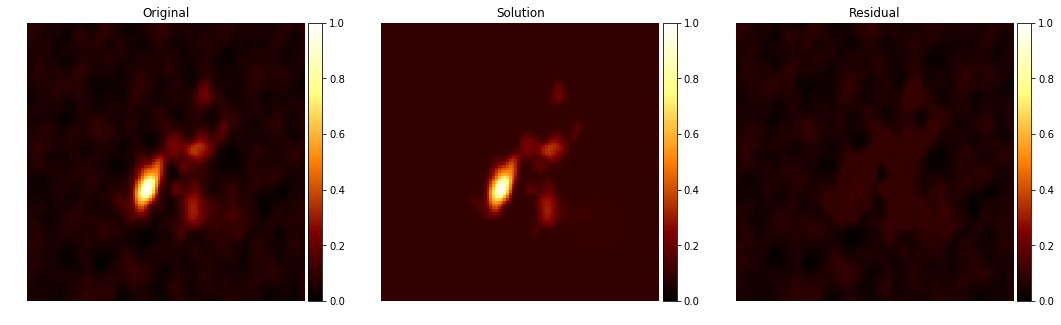

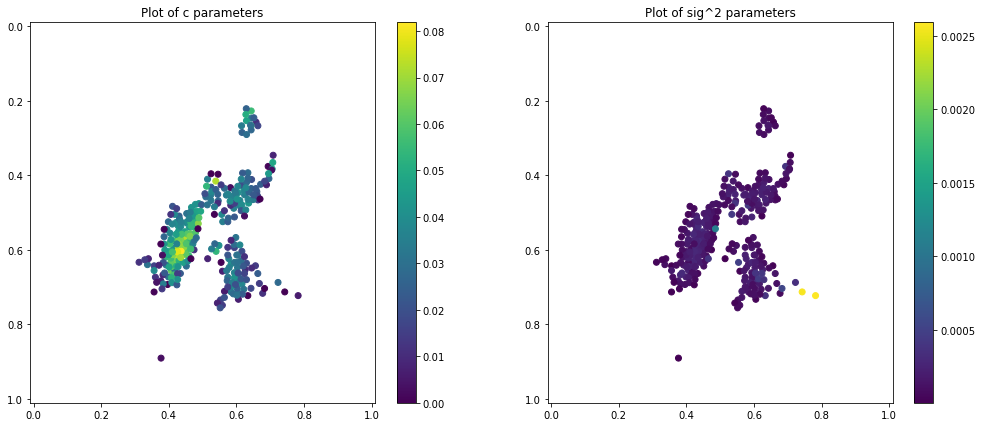

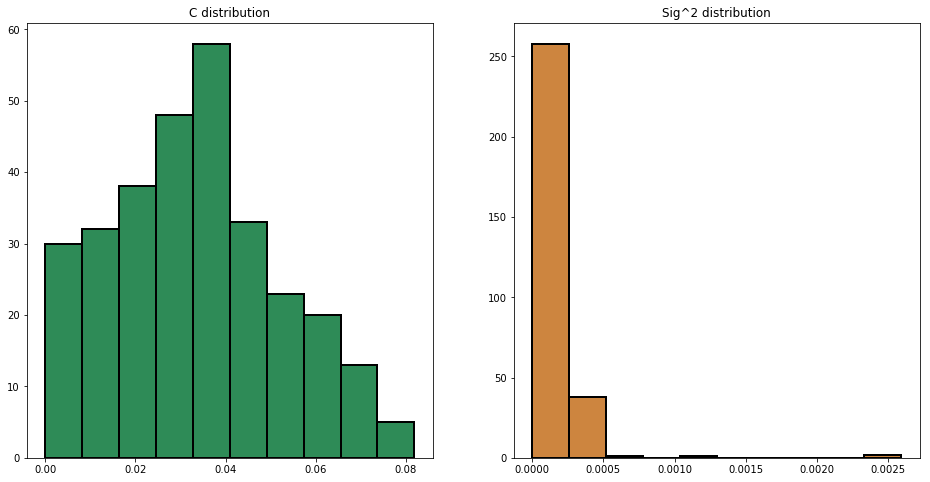

##########################################################################################
Processing example with alpha1: 1.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004349040374708951
Residual Variance: 1.8539766104018308e-05
Flux Lost: 0.008734248588227736
Flux Addition: 0.005870630197752551
psi1(u-f): 0.0005212384191381459
Exceeded Pixels: 438
Sharpness: 3.8054679863963234
psi2(grad u): 0.02497422043716463
Total elapsed time: 521.6711745262146 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06560863401537702
Mean min distance between collocation 

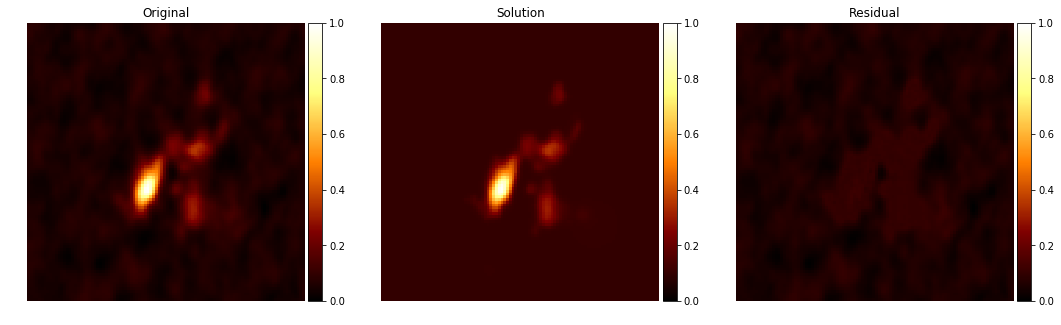

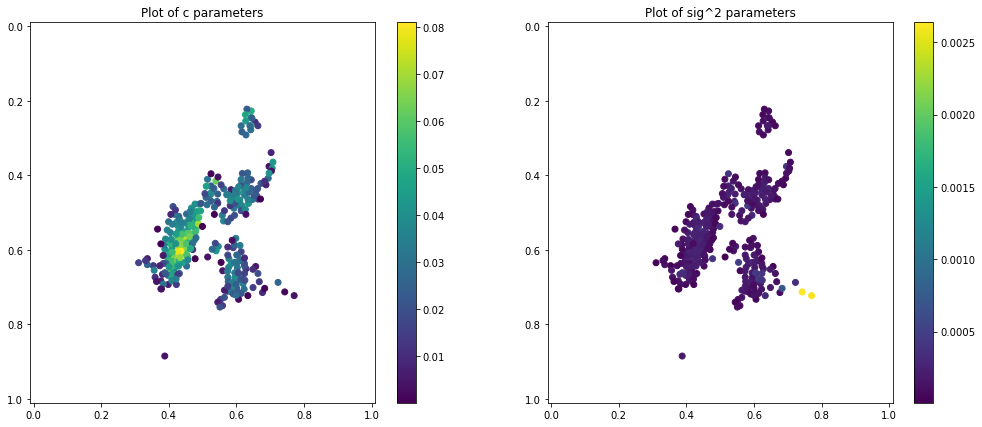

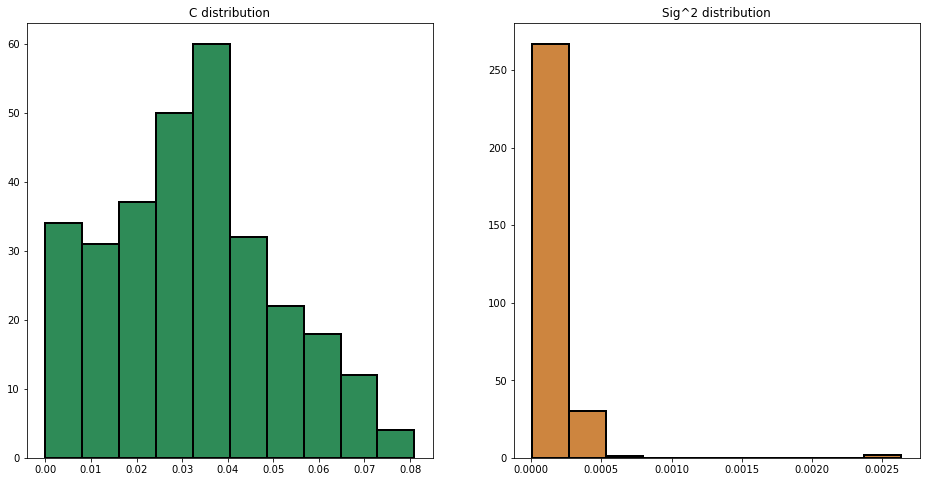

##########################################################################################
Processing example with alpha1: 1.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.004391719466394413
Residual Variance: 1.886871383608354e-05
Flux Lost: 0.008917409699820463
Flux Addition: 0.005889828613649009
psi1(u-f): 0.0005539636484023528
Exceeded Pixels: 424
Sharpness: 3.805243870971197
psi2(grad u): 0.02494455675016278
Total elapsed time: 508.13000297546387 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06538291300309071
Mean min distance between collocation 

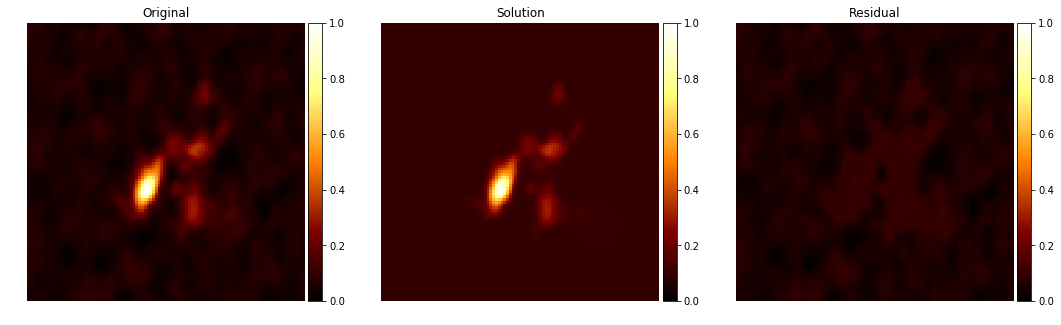

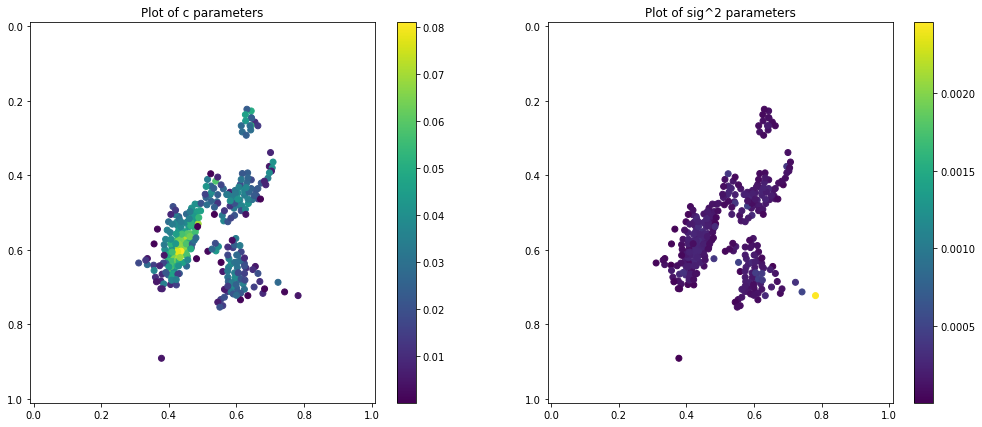

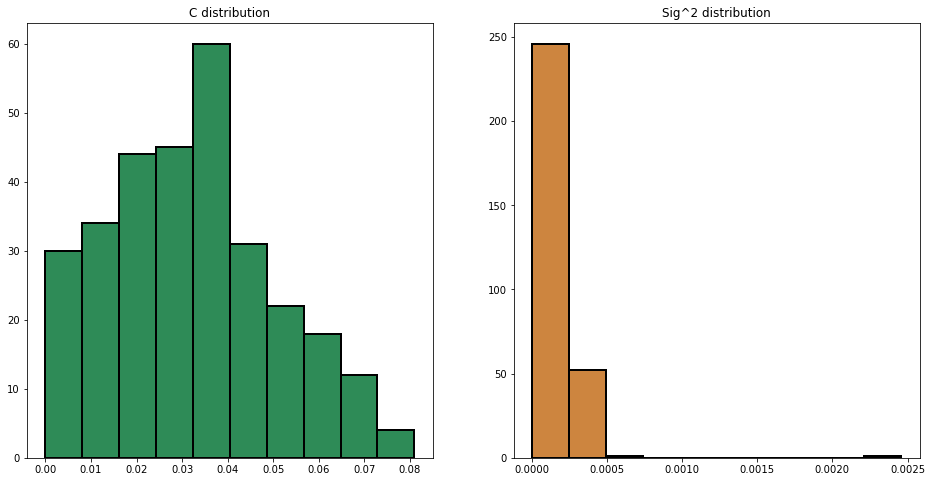

##########################################################################################
Processing example with alpha1: 2.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.004812472265178121
Residual Variance: 2.259009442003789e-05
Flux Lost: 0.009553990071343556
Flux Addition: 0.0060212265228209326
psi1(u-f): 0.000542531889712967
Exceeded Pixels: 439
Sharpness: 3.804666331973061
psi2(grad u): 0.02501813610540086
Total elapsed time: 520.4130973815918 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06566573917984479
Mean min distance between collocation an

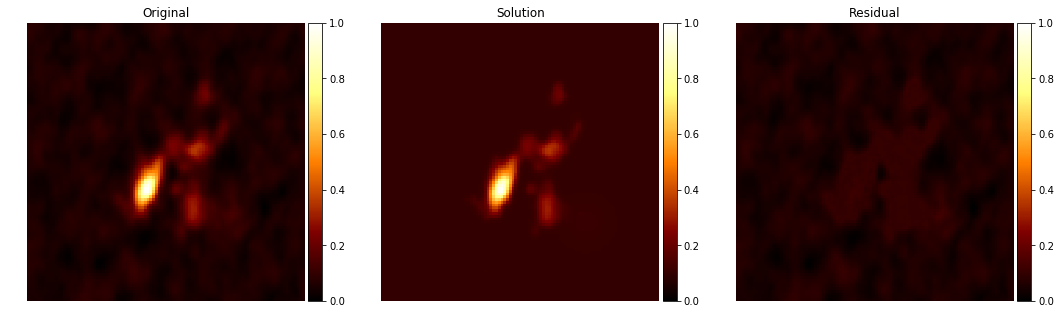

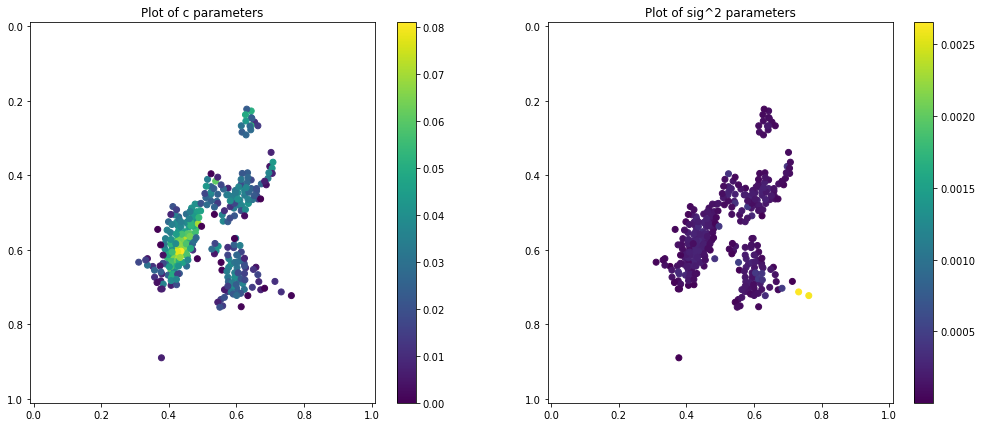

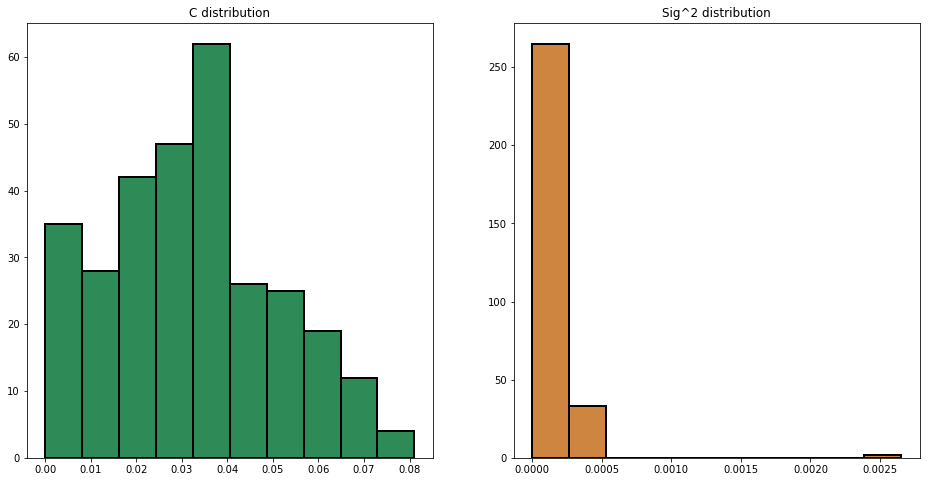

##########################################################################################
Processing example with alpha1: 2.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.004378521360602051
Residual Variance: 1.8684414640798204e-05
Flux Lost: 0.008986480678538149
Flux Addition: 0.00572033738224663
psi1(u-f): 0.0005064462168562123
Exceeded Pixels: 424
Sharpness: 3.8076119715281496
psi2(grad u): 0.02494031271443536
Total elapsed time: 512.9198288917542 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06605722094716604
Mean min distance between collocation 

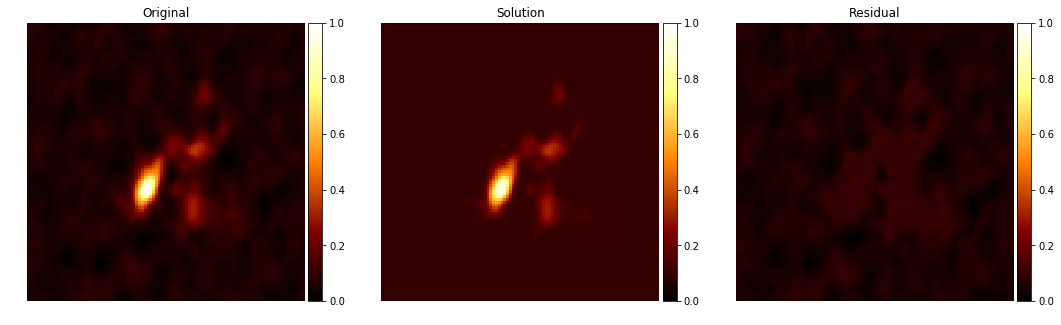

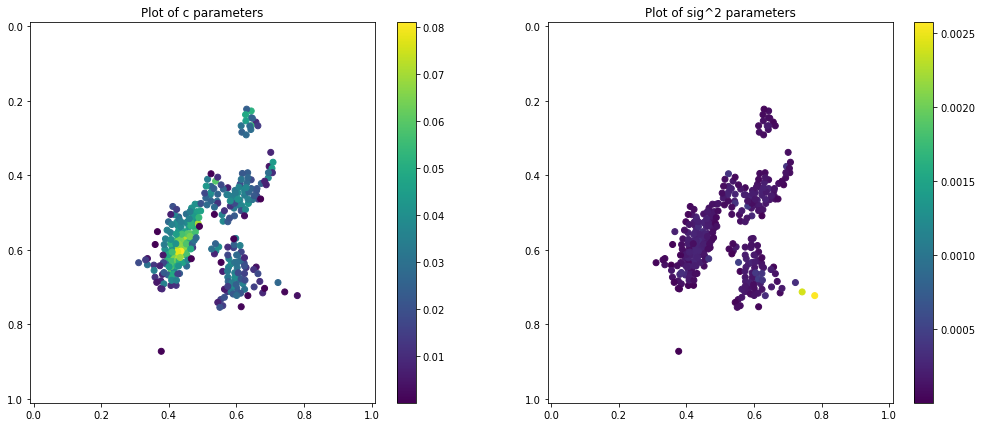

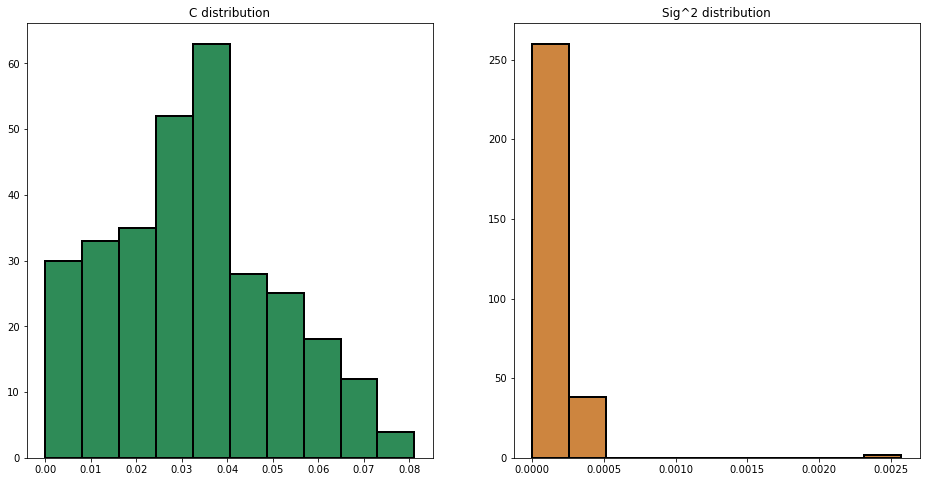

##########################################################################################
Processing example with alpha1: 2.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.00436085510900795
Residual Variance: 1.849937268727005e-05
Flux Lost: 0.009013081714554607
Flux Addition: 0.005645734352048916
psi1(u-f): 0.00047249783994492655
Exceeded Pixels: 426
Sharpness: 3.808443270653289
psi2(grad u): 0.02501120965479874
Total elapsed time: 518.8214356899261 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06613993623599826
Mean min distance between collocation an

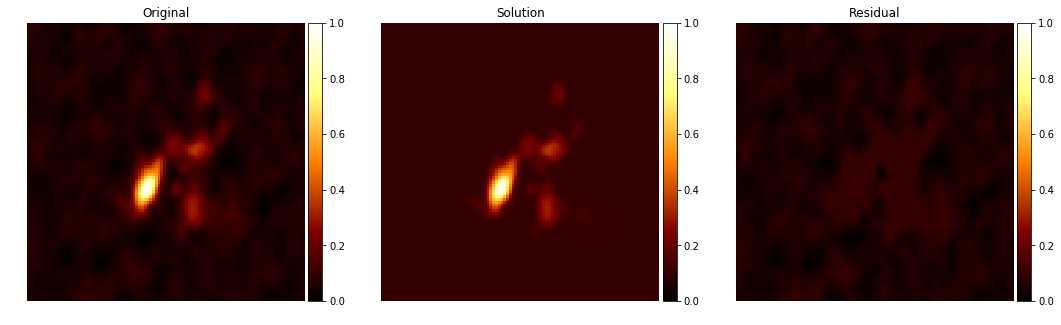

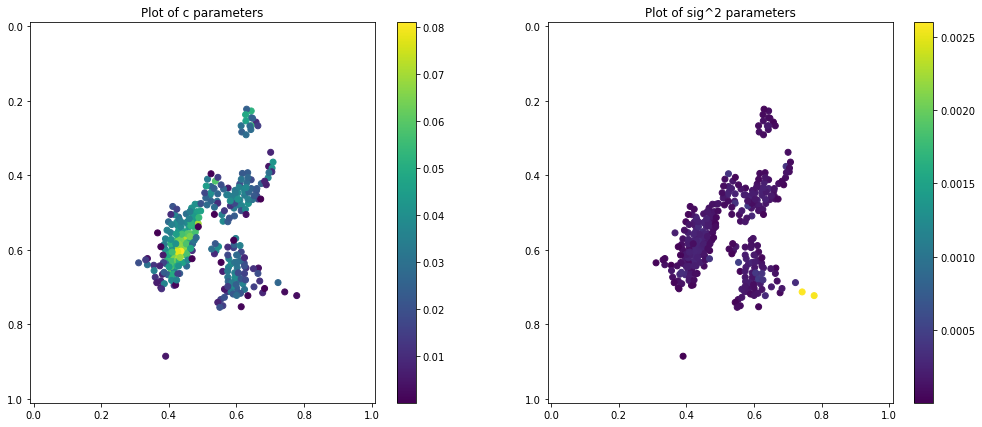

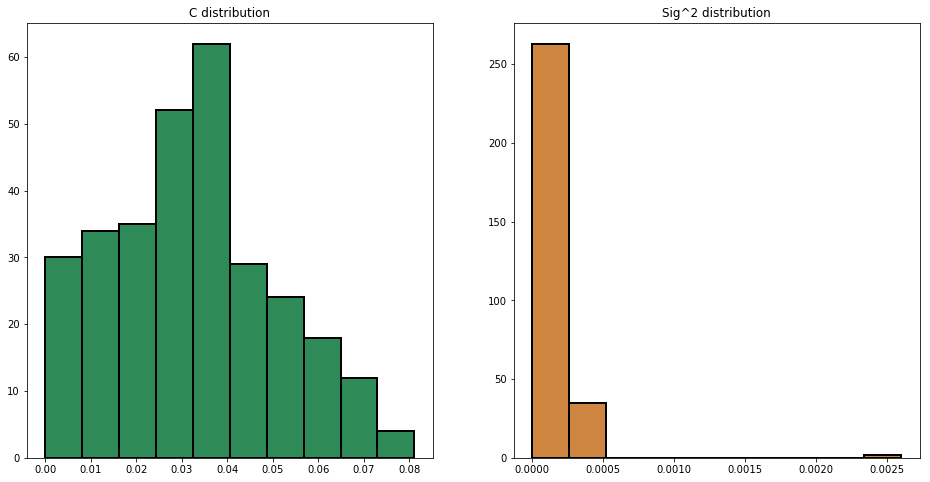

##########################################################################################
Processing example with alpha1: 2.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004385458445590858
Residual Variance: 1.871738922525323e-05
Flux Lost: 0.009056708598319458
Flux Addition: 0.005698571515932502
psi1(u-f): 0.0004861001843737817
Exceeded Pixels: 428
Sharpness: 3.8059243798246154
psi2(grad u): 0.025045785961950725
Total elapsed time: 534.9447765350342 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06620584340145812
Mean min distance between collocation

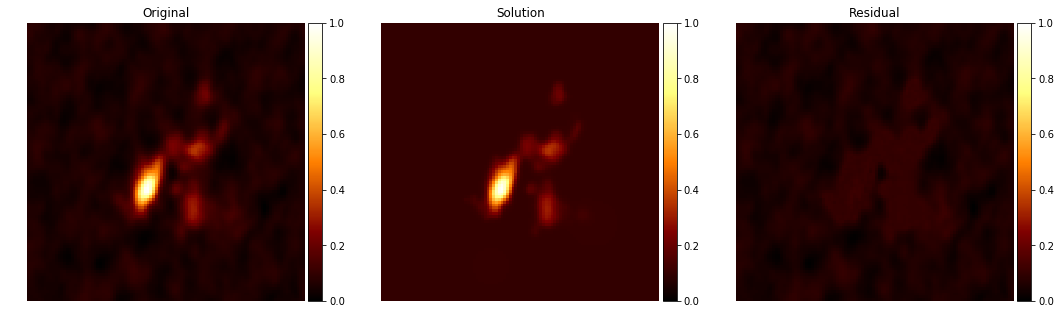

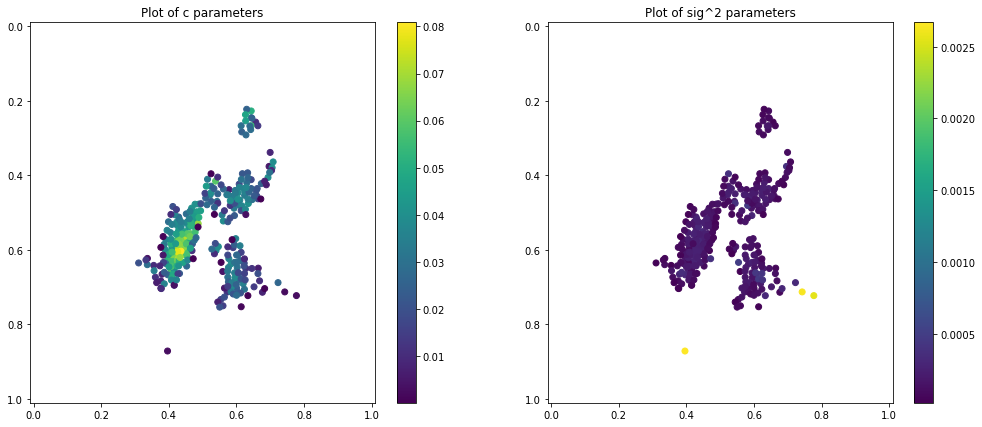

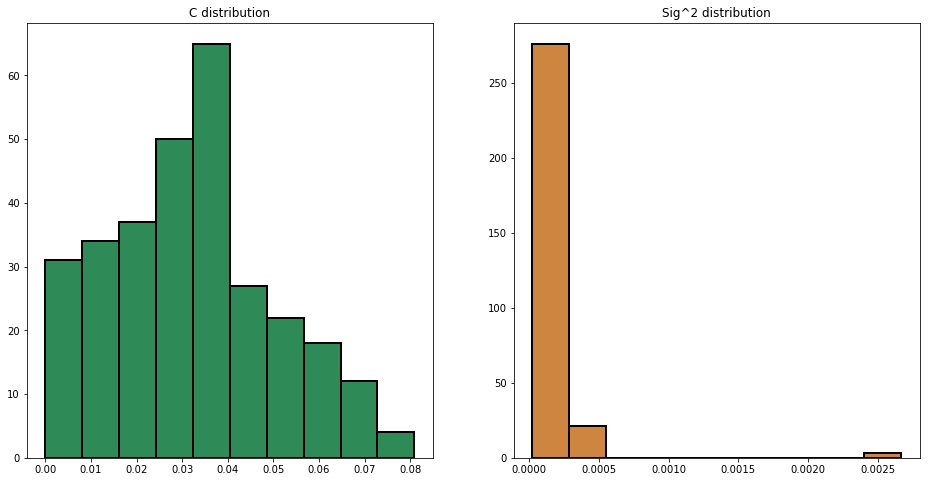

##########################################################################################
Processing example with alpha1: 3.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004387707136550467
Residual Variance: 1.8698714709700693e-05
Flux Lost: 0.009063836080276503
Flux Addition: 0.005582711041971814
psi1(u-f): 0.0004798095359658653
Exceeded Pixels: 431
Sharpness: 3.807634280535136
psi2(grad u): 0.02499192905790053
Total elapsed time: 518.166844367981 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06612821128558324
Mean min distance between collocation an

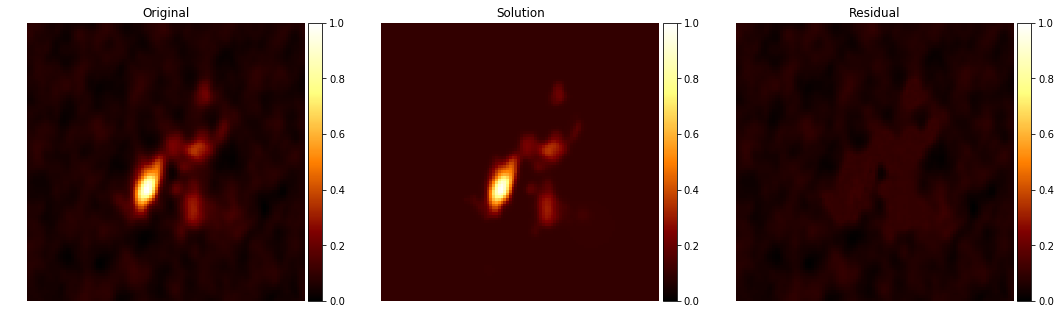

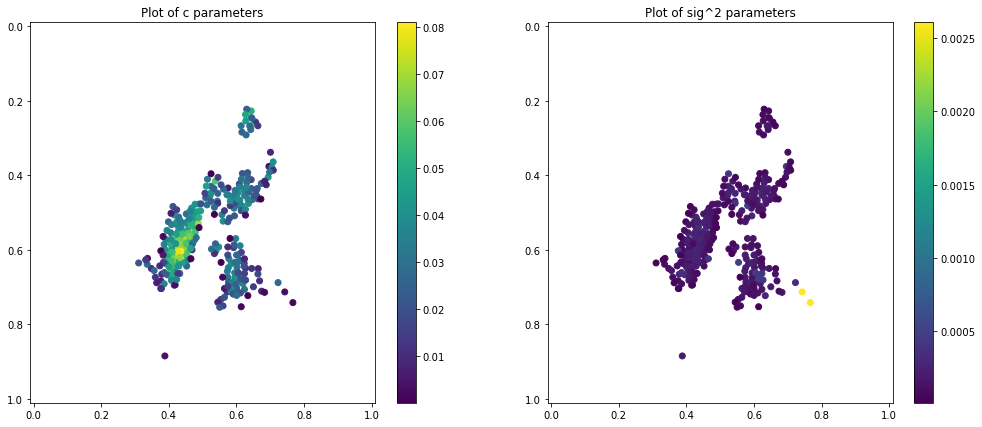

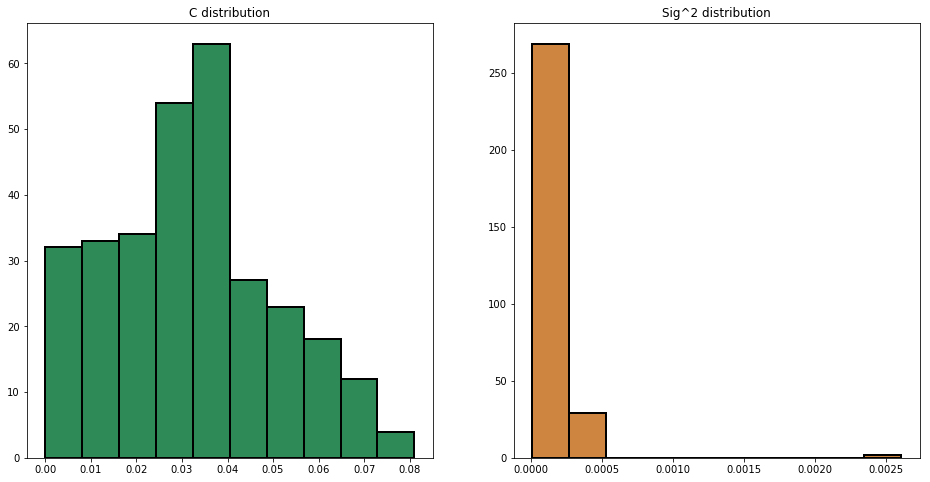

##########################################################################################
Processing example with alpha1: 3.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004380103170181896
Residual Variance: 1.860932208472713e-05
Flux Lost: 0.009132308070080378
Flux Addition: 0.005580416989120885
psi1(u-f): 0.00046693123843866277
Exceeded Pixels: 423
Sharpness: 3.807227563159326
psi2(grad u): 0.025051746765146186
Total elapsed time: 504.6068093776703 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06624120582699608
Mean min distance between collocation

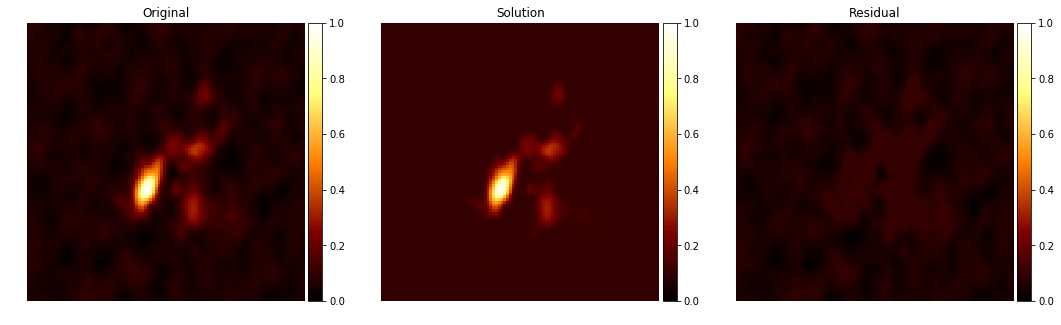

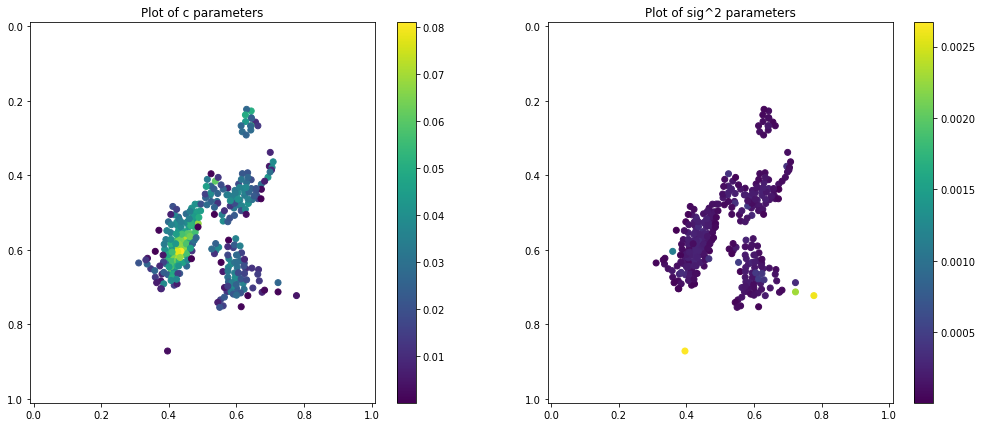

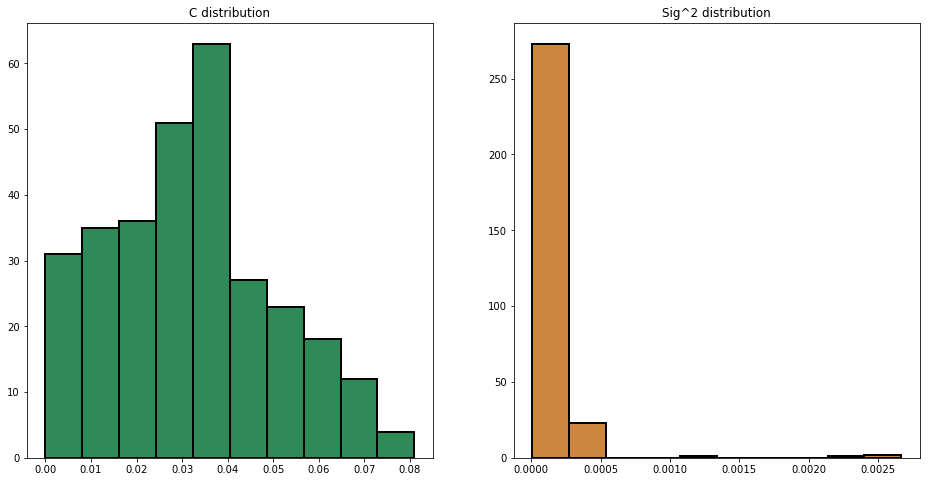

##########################################################################################
Processing example with alpha1: 3.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.0043448642453127505
Residual Variance: 1.8259420437101976e-05
Flux Lost: 0.009130899060727407
Flux Addition: 0.005450467277226222
psi1(u-f): 0.00041075974309191094
Exceeded Pixels: 421
Sharpness: 3.812293850472417
psi2(grad u): 0.02488290672475901
Total elapsed time: 458.58827543258667 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0665208081918344
Mean min distance between collocation

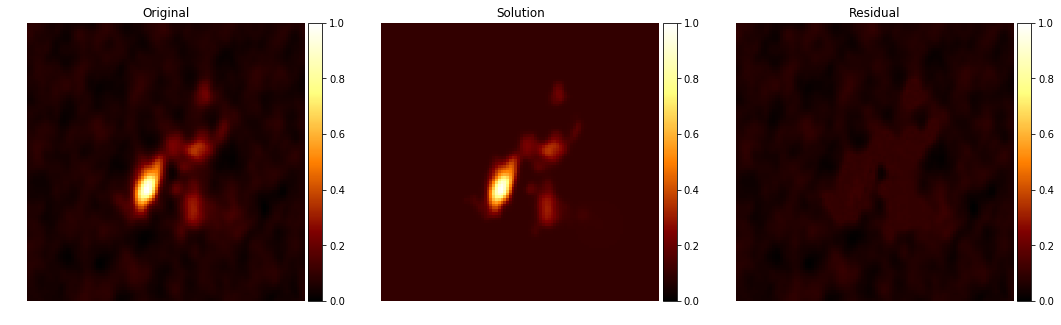

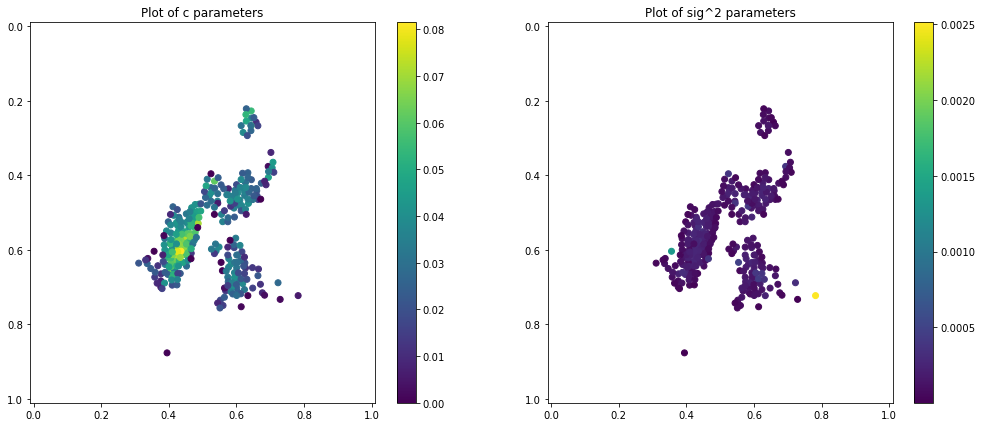

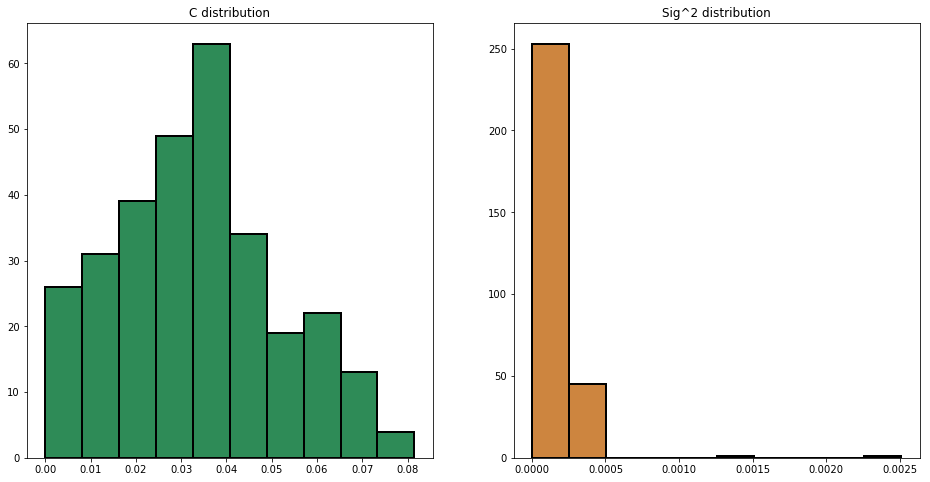

##########################################################################################
Processing example with alpha1: 3.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.00439041828975768
Residual Variance: 1.862106430834771e-05
Flux Lost: 0.00925013261796533
Flux Addition: 0.005463272426427185
psi1(u-f): 0.00045146146187490557
Exceeded Pixels: 420
Sharpness: 3.8088289502227357
psi2(grad u): 0.02498481845110193
Total elapsed time: 453.1082351207733 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06606939627972264
Mean min distance between collocation a

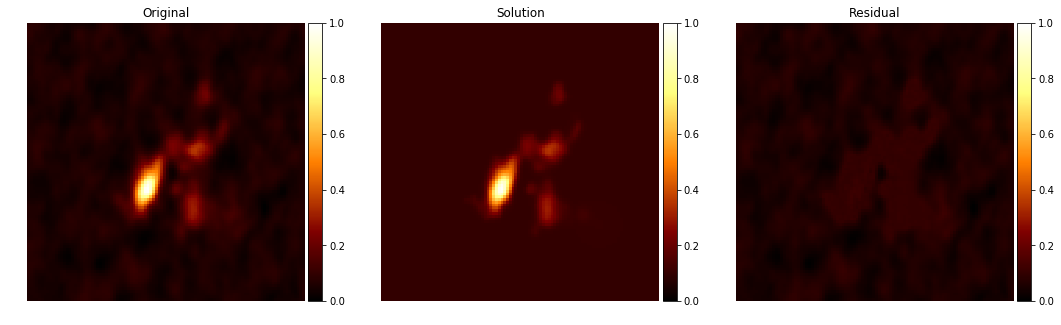

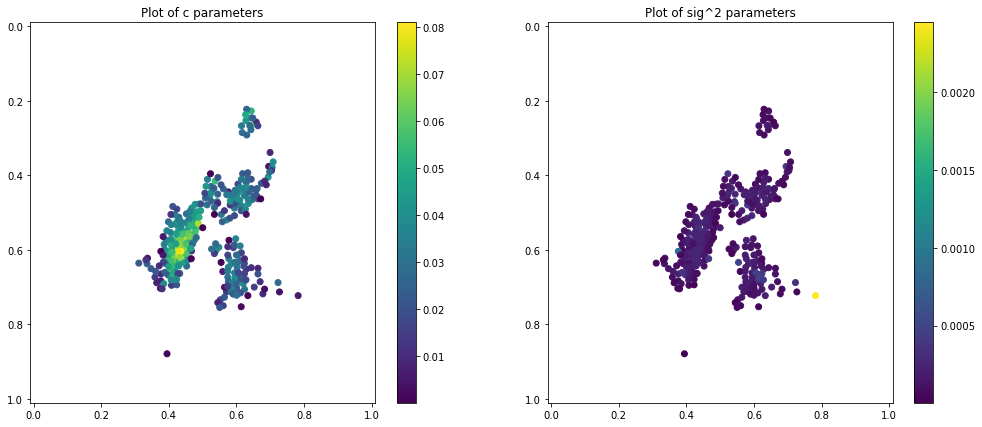

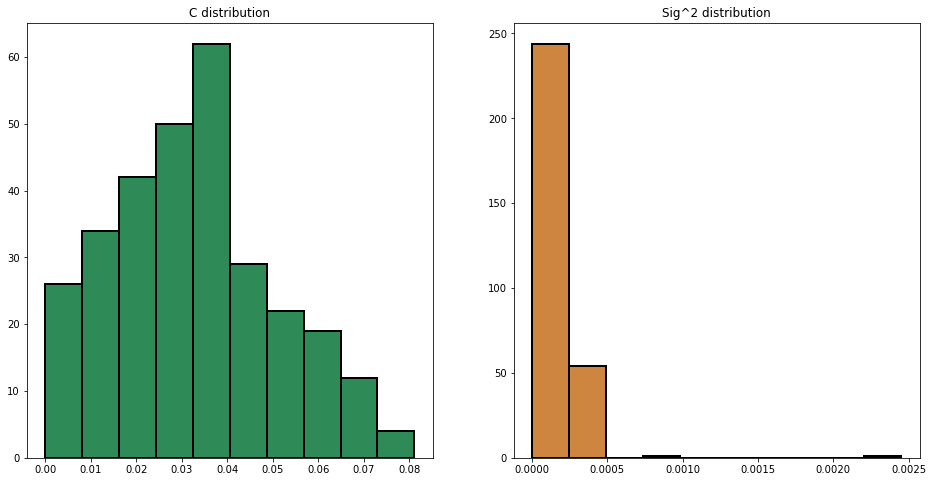

##########################################################################################
Processing example with alpha1: 4.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004355539755830243
Residual Variance: 1.8283724651784543e-05
Flux Lost: 0.009264405679732192
Flux Addition: 0.005385276241131807
psi1(u-f): 0.0004075410889398208
Exceeded Pixels: 415
Sharpness: 3.812945930231218
psi2(grad u): 0.024878017624406883
Total elapsed time: 449.5175120830536 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06649042821595898
Mean min distance between collocation 

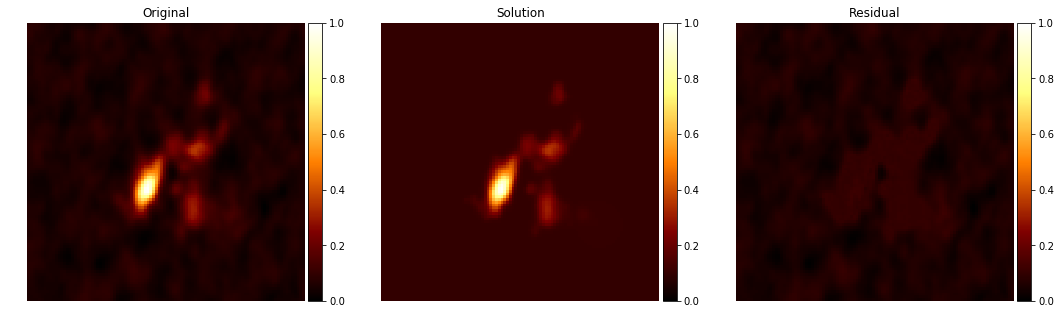

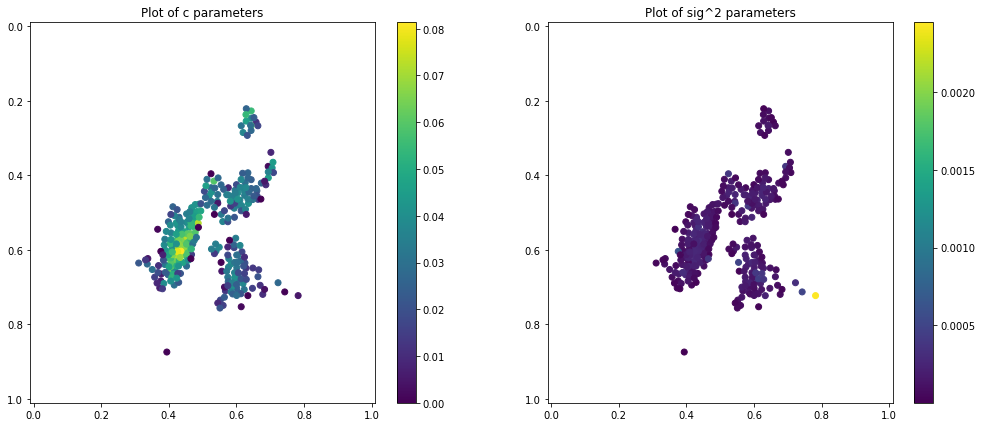

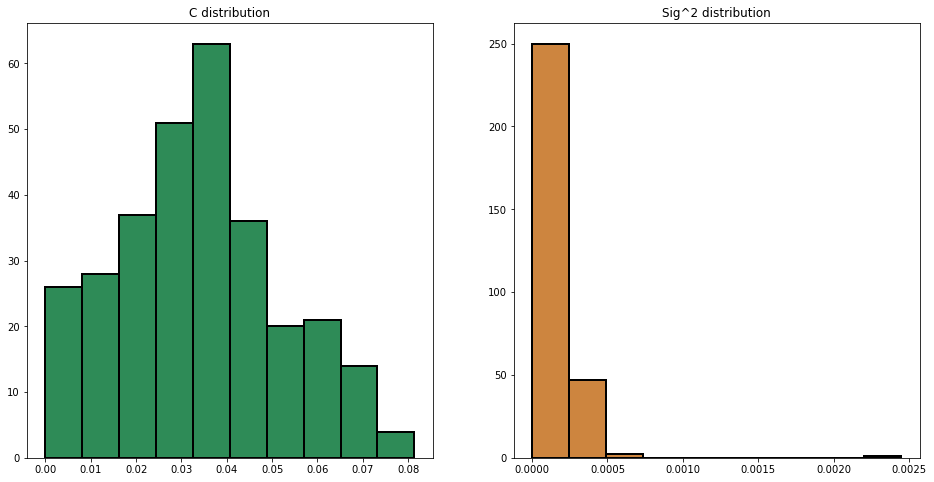

##########################################################################################
Processing example with alpha1: 4.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004411960366811433
Residual Variance: 1.874086144728235e-05
Flux Lost: 0.009402099717849631
Flux Addition: 0.005418420747370361
psi1(u-f): 0.0004408794620369311
Exceeded Pixels: 415
Sharpness: 3.8081005085112825
psi2(grad u): 0.025065662627431266
Total elapsed time: 465.7003529071808 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06665681473979047
Mean min distance between collocation

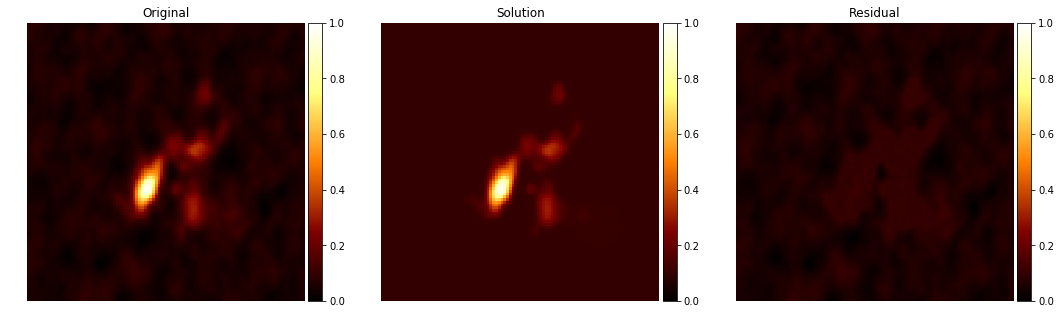

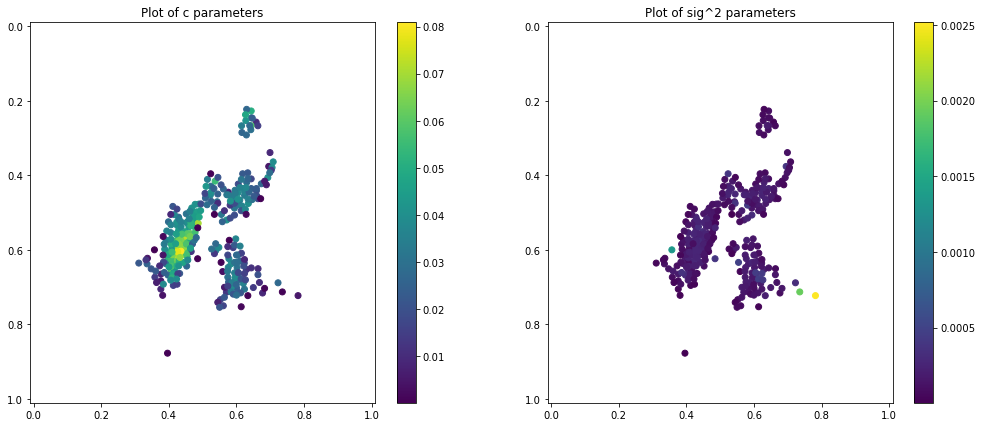

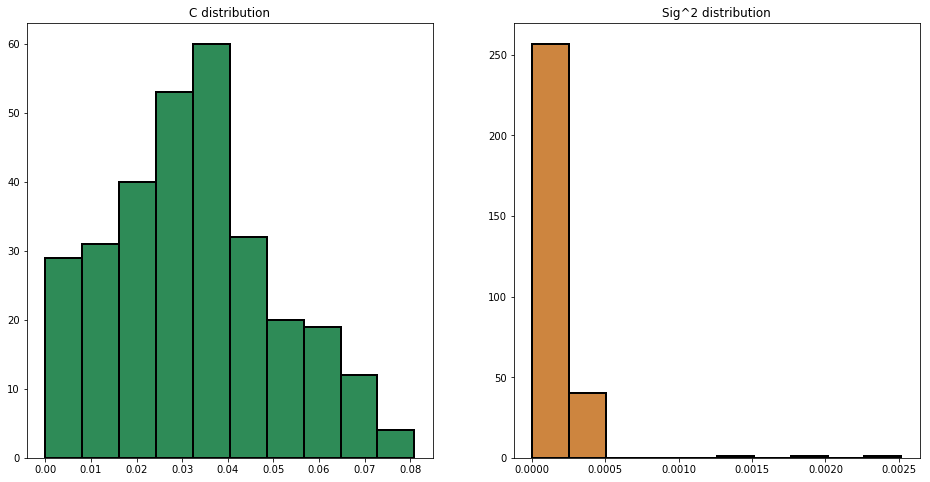

##########################################################################################
Processing example with alpha1: 4.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004505618610294499
Residual Variance: 1.9516432987916318e-05
Flux Lost: 0.009671346141314771
Flux Addition: 0.005526968494126617
psi1(u-f): 0.0004891069108665911
Exceeded Pixels: 406
Sharpness: 3.8043263661197946
psi2(grad u): 0.025192135084529547
Total elapsed time: 454.1240153312683 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0664760981992699
Mean min distance between collocation 

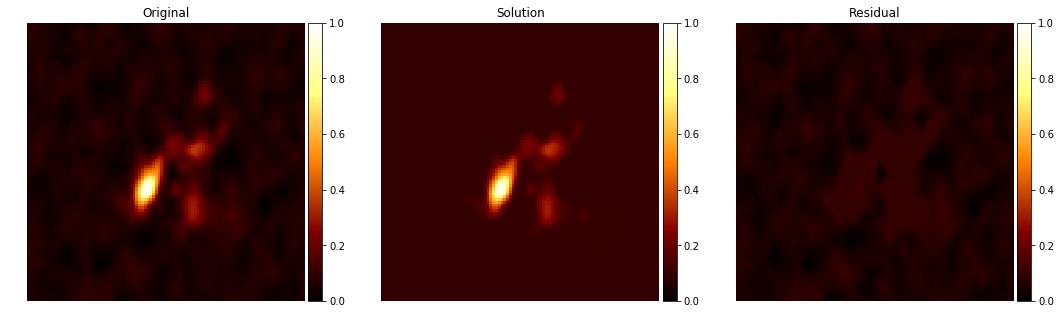

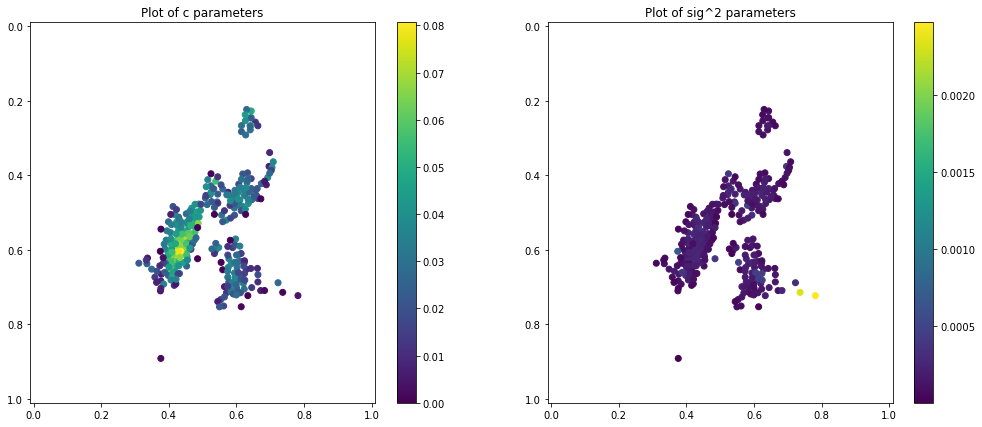

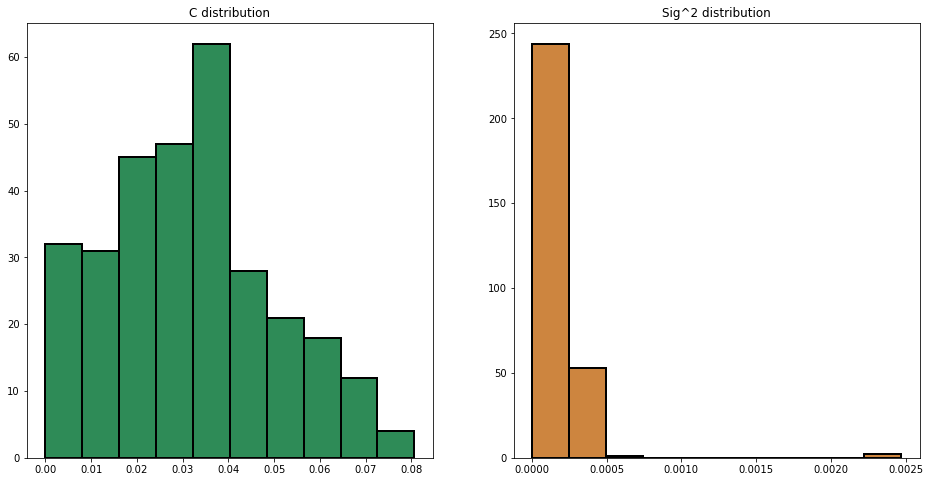

##########################################################################################
Processing example with alpha1: 4.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004461609823920736
Residual Variance: 1.9098516408779676e-05
Flux Lost: 0.009589936193707377
Flux Addition: 0.005384490865560657
psi1(u-f): 0.0004542236648313716
Exceeded Pixels: 404
Sharpness: 3.8076399711730833
psi2(grad u): 0.025081064069339506
Total elapsed time: 455.19969630241394 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06650117287521728
Mean min distance between collocati

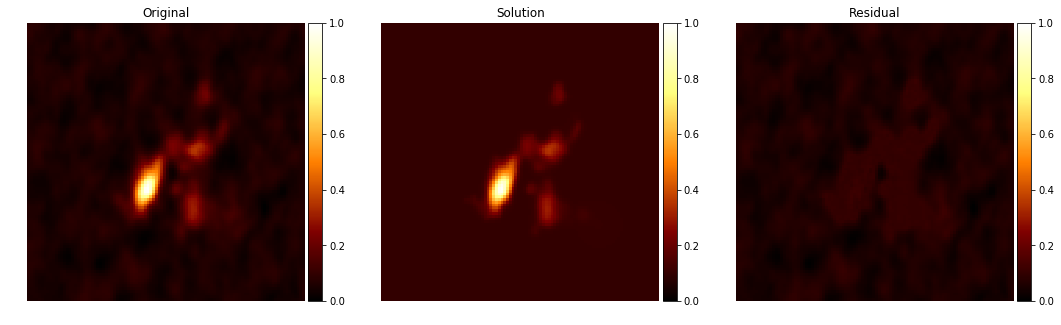

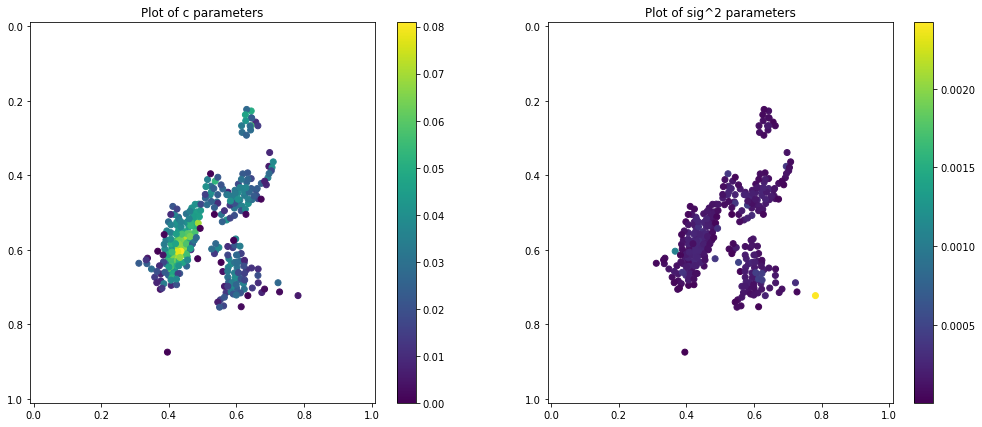

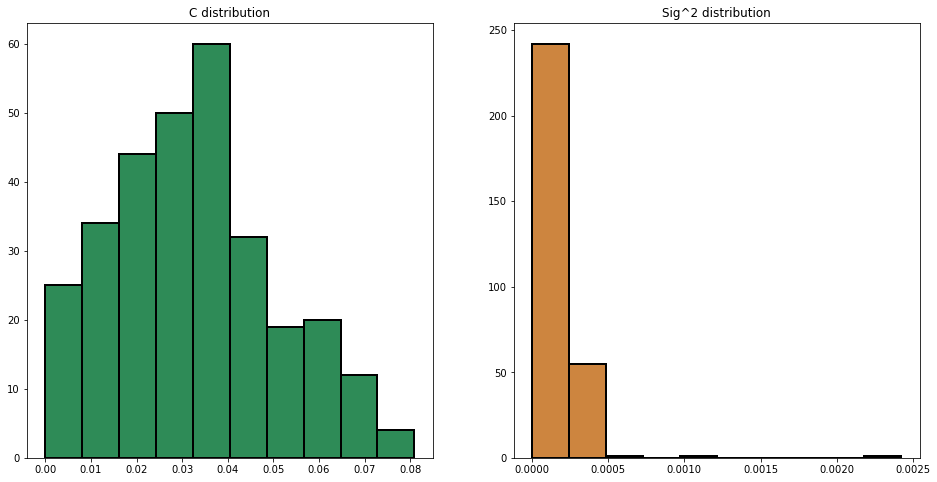

##########################################################################################
Processing example with alpha1: 5.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004475671316985471
Residual Variance: 1.9194969793844032e-05
Flux Lost: 0.009663972432364432
Flux Addition: 0.005383114404795289
psi1(u-f): 0.0004489770372064917
Exceeded Pixels: 403
Sharpness: 3.807815805571637
psi2(grad u): 0.02511040992720502
Total elapsed time: 457.7385811805725 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06678961211533906
Mean min distance between collocation a

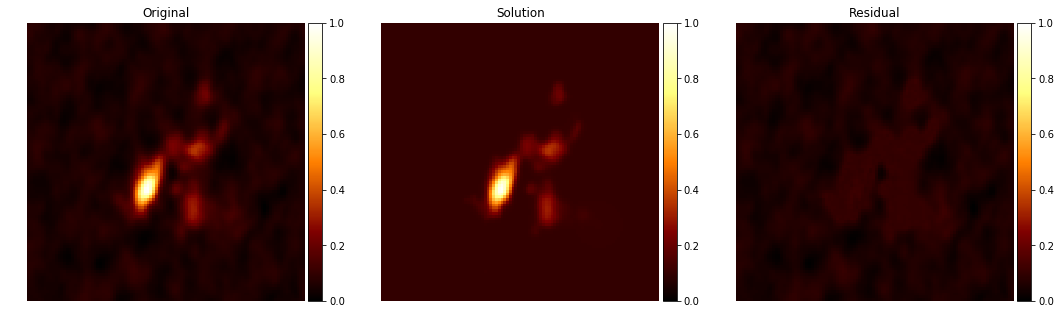

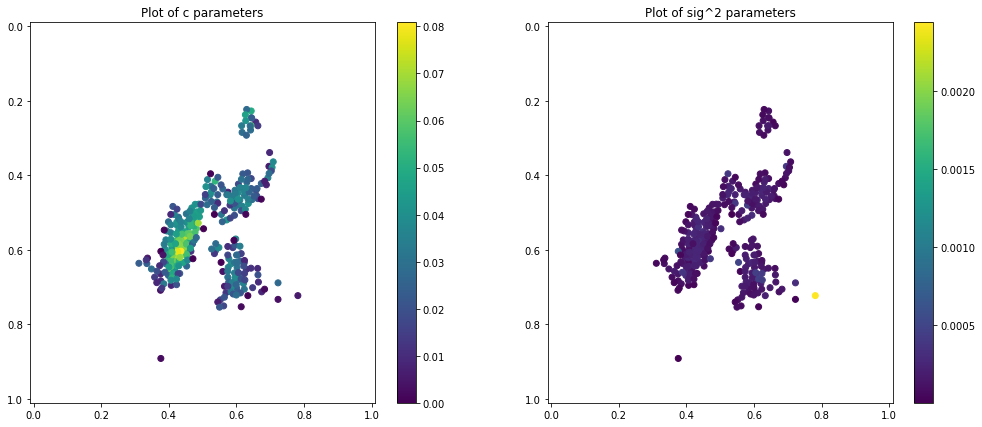

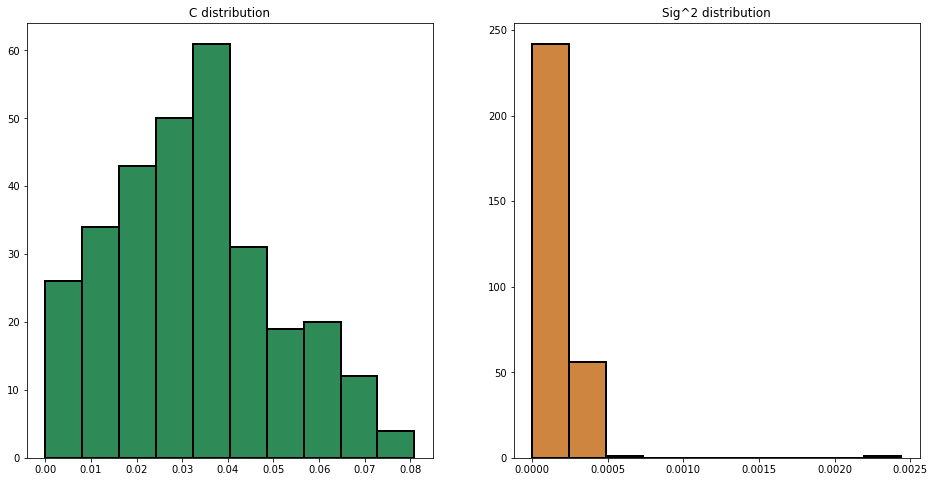

##########################################################################################
Processing example with alpha1: 5.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004516645089499324
Residual Variance: 1.954037996619995e-05
Flux Lost: 0.009760618078502262
Flux Addition: 0.005421219986893207
psi1(u-f): 0.0004622110249554918
Exceeded Pixels: 408
Sharpness: 3.8075775233940243
psi2(grad u): 0.0251615871189051
Total elapsed time: 427.944696187973 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.066646085104536
Mean min distance between collocation and 

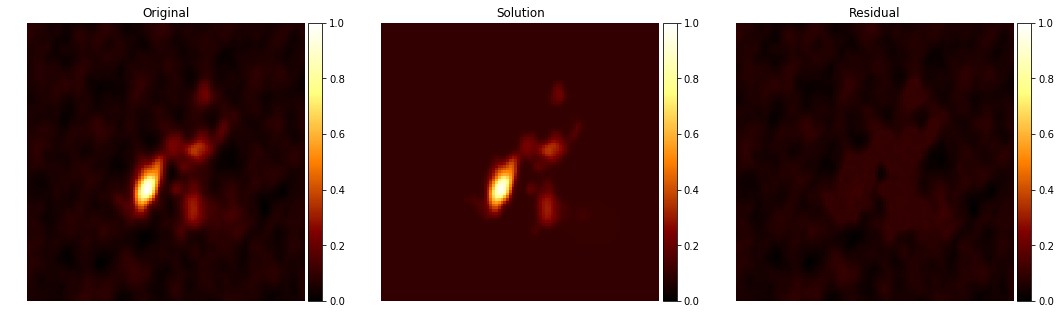

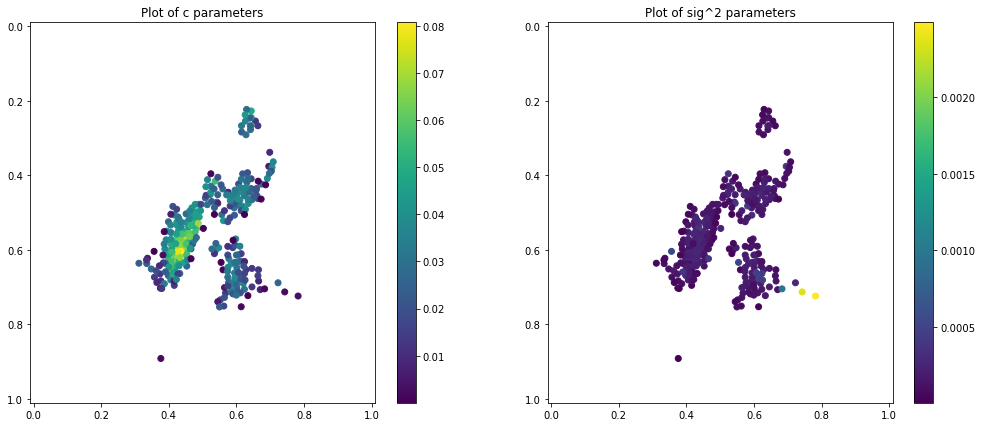

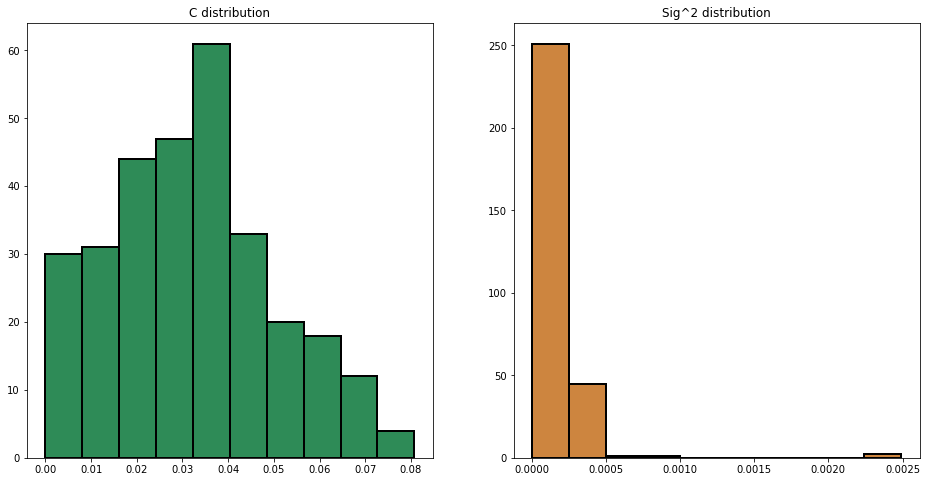

##########################################################################################
Processing example with alpha1: 5.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004465435488242769
Residual Variance: 1.9052499750449126e-05
Flux Lost: 0.00968682242265044
Flux Addition: 0.00527754468688904
psi1(u-f): 0.00041540614746820974
Exceeded Pixels: 407
Sharpness: 3.8103178374430446
psi2(grad u): 0.025001379629508384
Total elapsed time: 411.506787776947 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06694693048140371
Mean min distance between collocation a

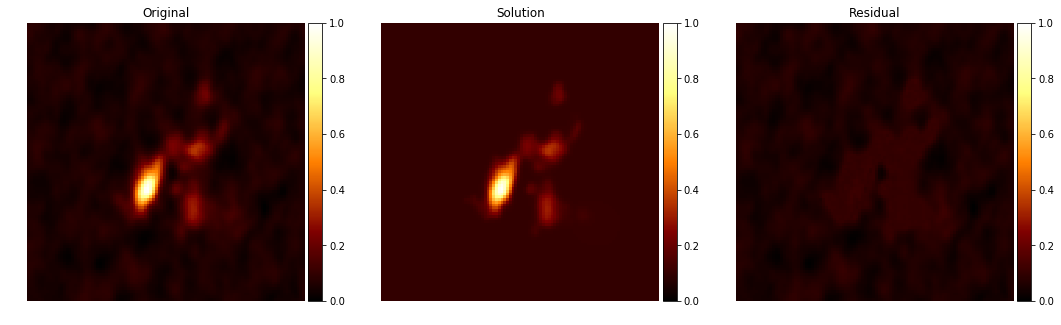

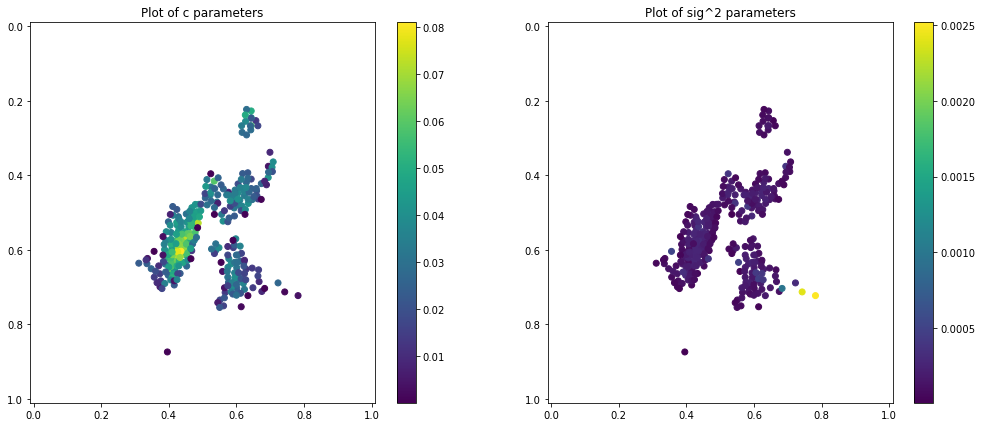

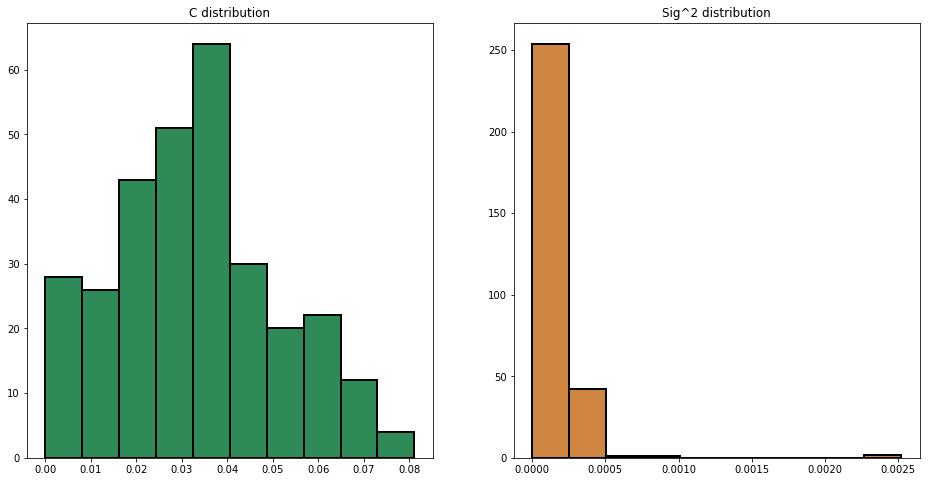

##########################################################################################
Processing example with alpha1: 5.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004526924791954804
Residual Variance: 1.952917438135039e-05
Flux Lost: 0.009938203867096356
Flux Addition: 0.005343417103431107
psi1(u-f): 0.00044922669160799976
Exceeded Pixels: 398
Sharpness: 3.8075166675470364
psi2(grad u): 0.025206412514755524
Total elapsed time: 414.6480278968811 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06683740958560903
Mean min distance between collocatio

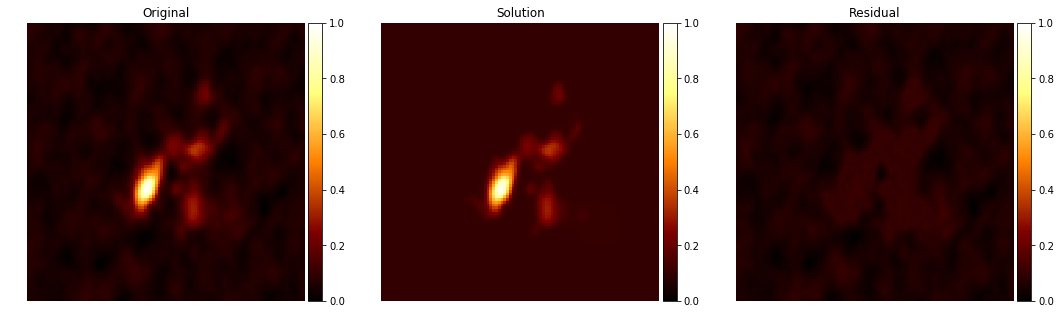

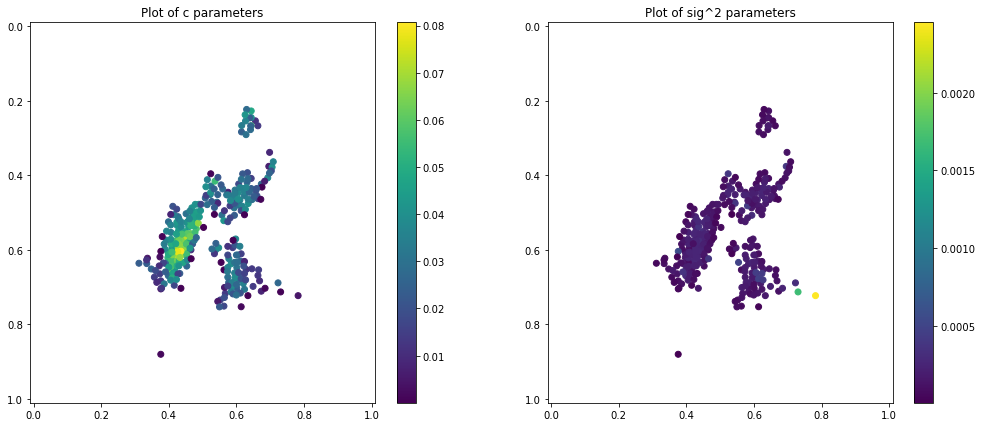

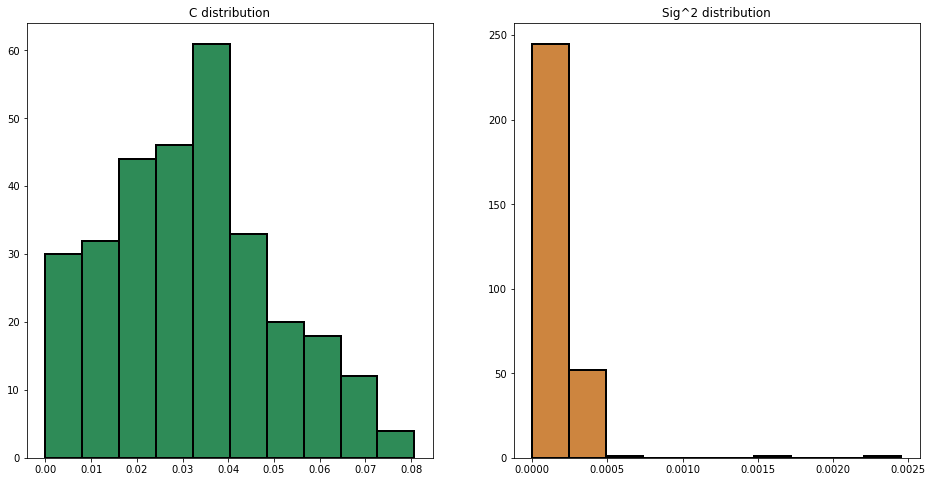

##########################################################################################
Processing example with alpha1: 6.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004476060071418806
Residual Variance: 1.9095140478712826e-05
Flux Lost: 0.00976751315516431
Flux Addition: 0.005230050607448256
psi1(u-f): 0.00040467945373713827
Exceeded Pixels: 407
Sharpness: 3.8103253809164643
psi2(grad u): 0.02499521485875233
Total elapsed time: 406.9250385761261 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0668087458057286
Mean min distance between collocation a

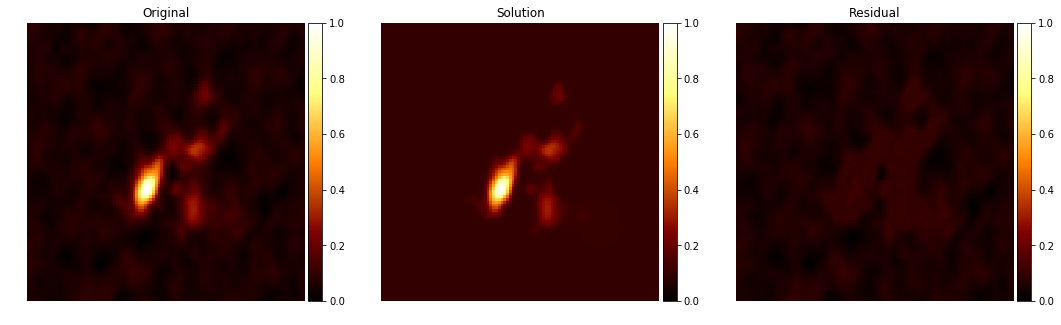

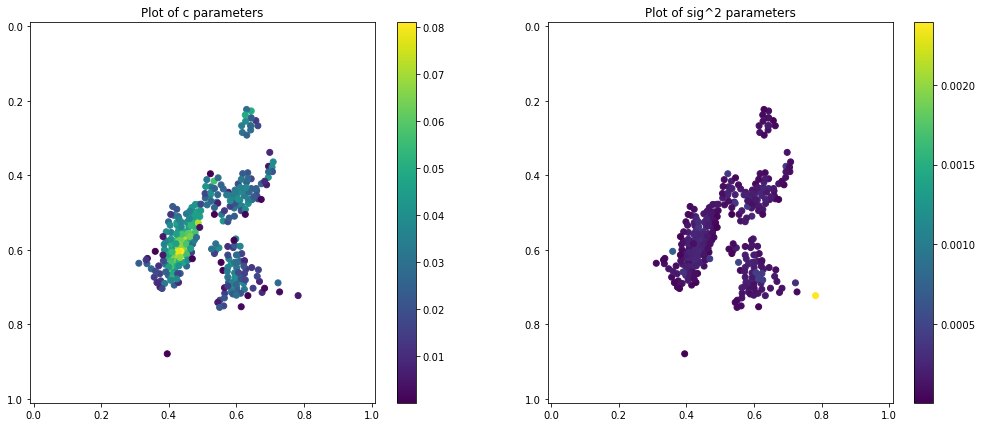

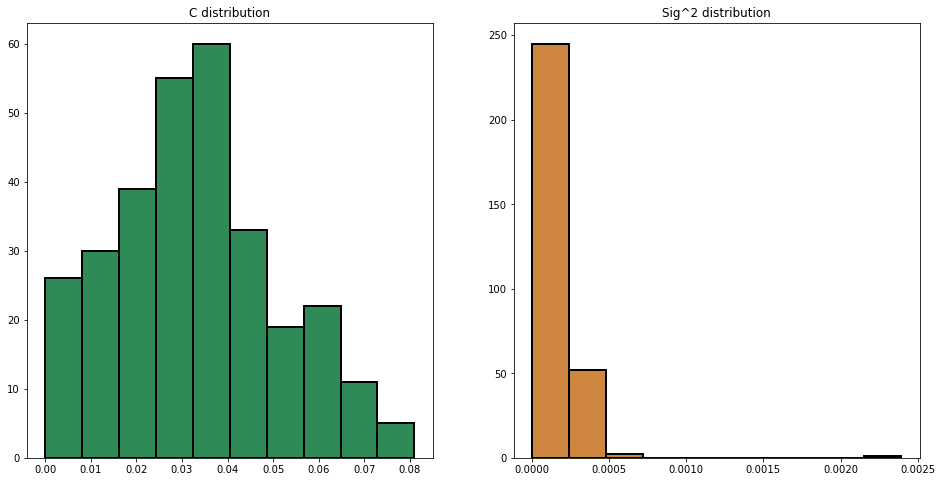

##########################################################################################
Processing example with alpha1: 6.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004473254426233541
Residual Variance: 1.906752017640687e-05
Flux Lost: 0.009750826846449377
Flux Addition: 0.0052073060697149206
psi1(u-f): 0.0003945500442275789
Exceeded Pixels: 409
Sharpness: 3.8107558123841083
psi2(grad u): 0.0249009069017696
Total elapsed time: 406.5088369846344 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06662108443151667
Mean min distance between collocation 

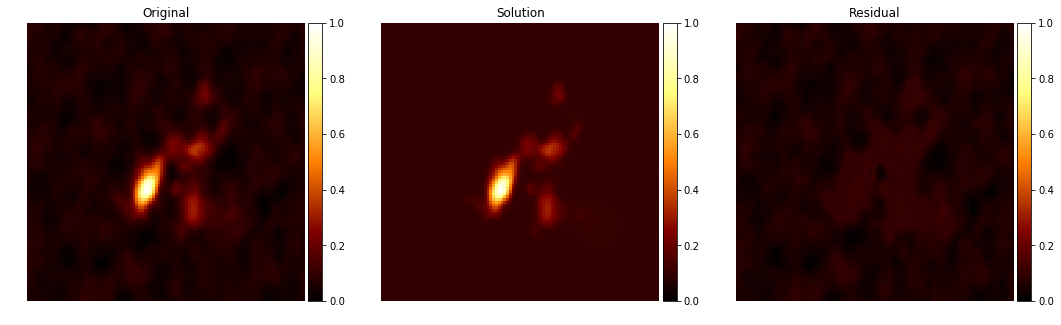

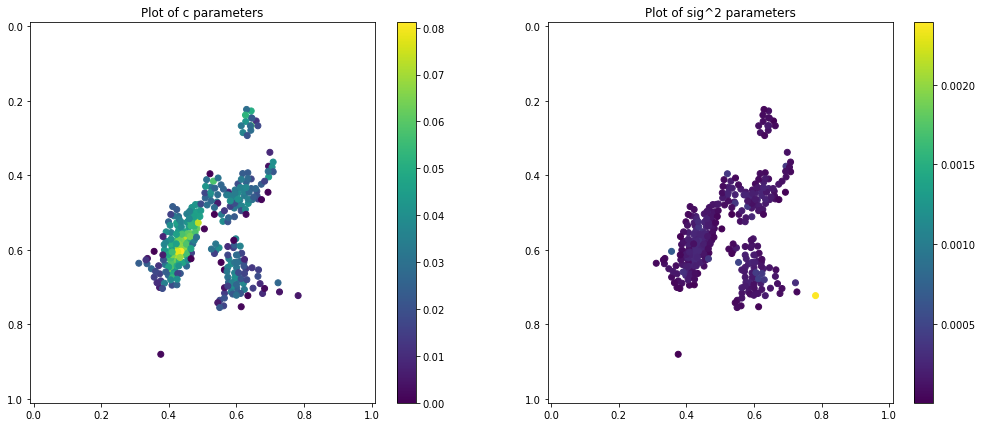

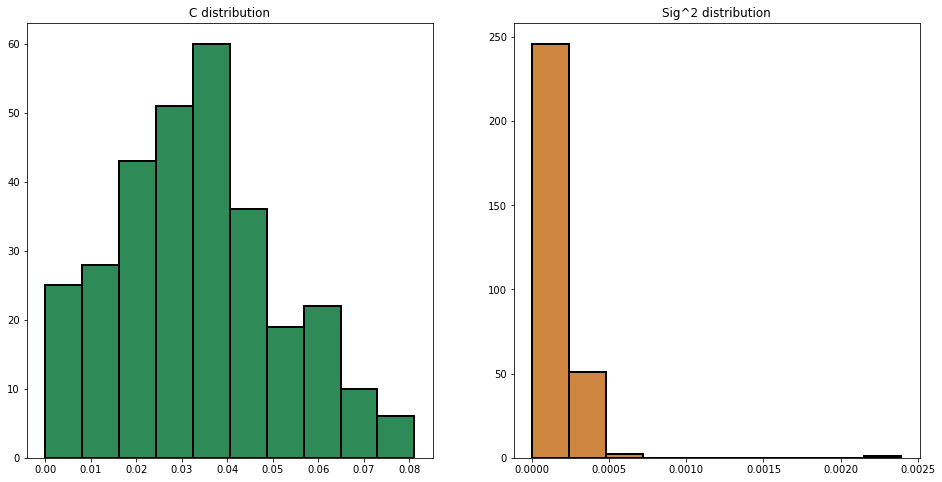

##########################################################################################
Processing example with alpha1: 6.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004563467696299054
Residual Variance: 1.9764541437391665e-05
Flux Lost: 0.01009402153354967
Flux Addition: 0.00527398023630107
psi1(u-f): 0.0004440643887011833
Exceeded Pixels: 395
Sharpness: 3.8079361012696884
psi2(grad u): 0.025164601419436015
Total elapsed time: 412.64001274108887 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0667715238388373
Mean min distance between collocation a

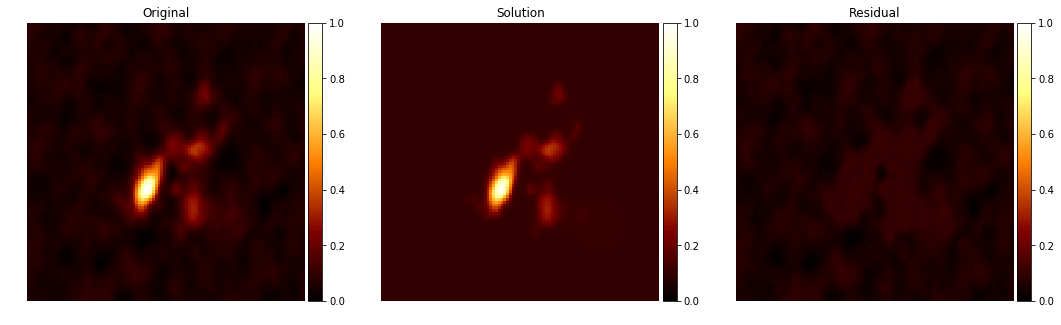

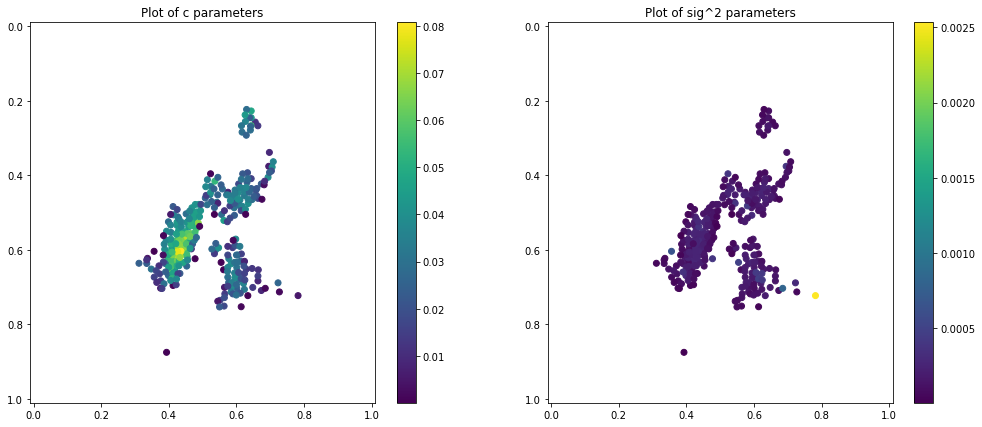

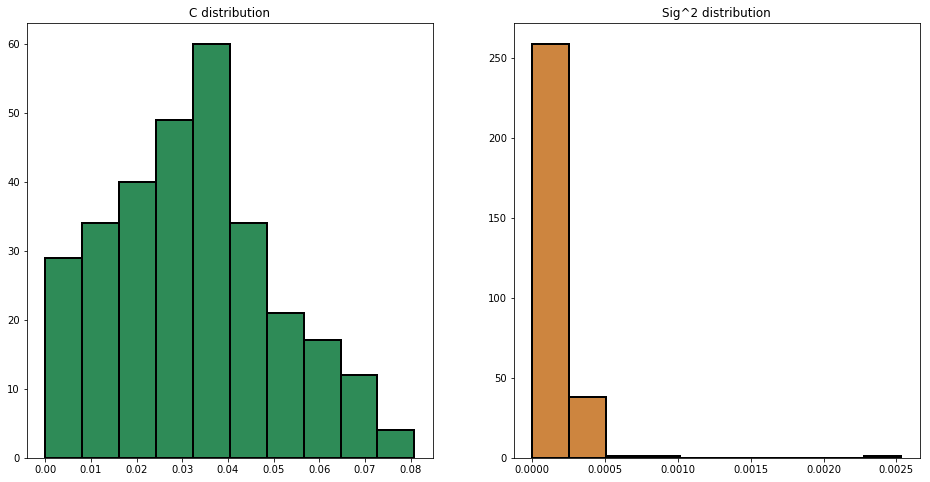

##########################################################################################
Processing example with alpha1: 6.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.004518566374861375
Residual Variance: 1.93892108438484e-05
Flux Lost: 0.009950864099524667
Flux Addition: 0.005205159567066341
psi1(u-f): 0.0004151670933411636
Exceeded Pixels: 401
Sharpness: 3.8103431011474824
psi2(grad u): 0.025068667197256336
Total elapsed time: 403.92041516304016 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06676966856184886
Mean min distance between collocation

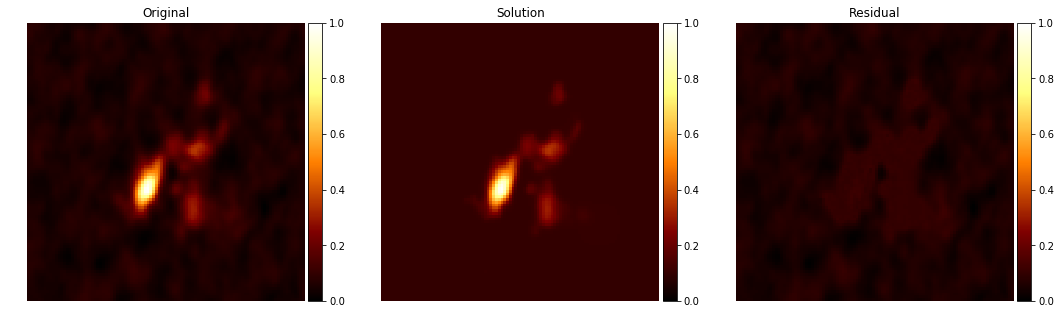

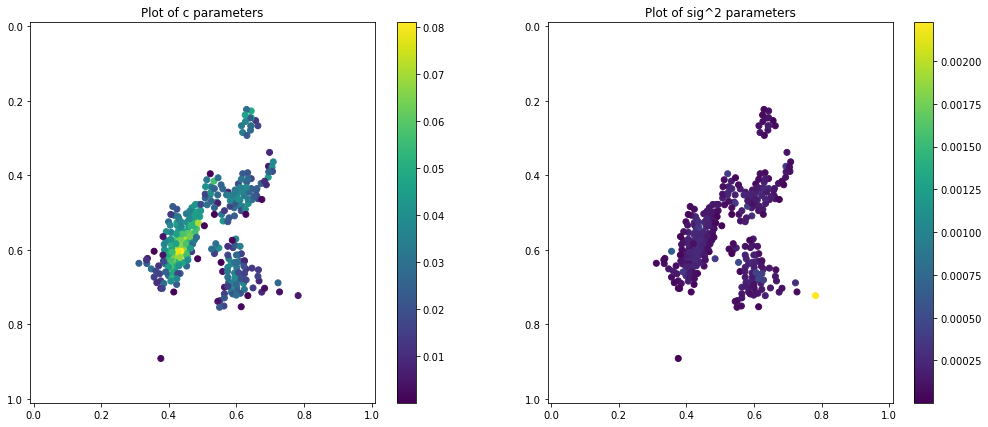

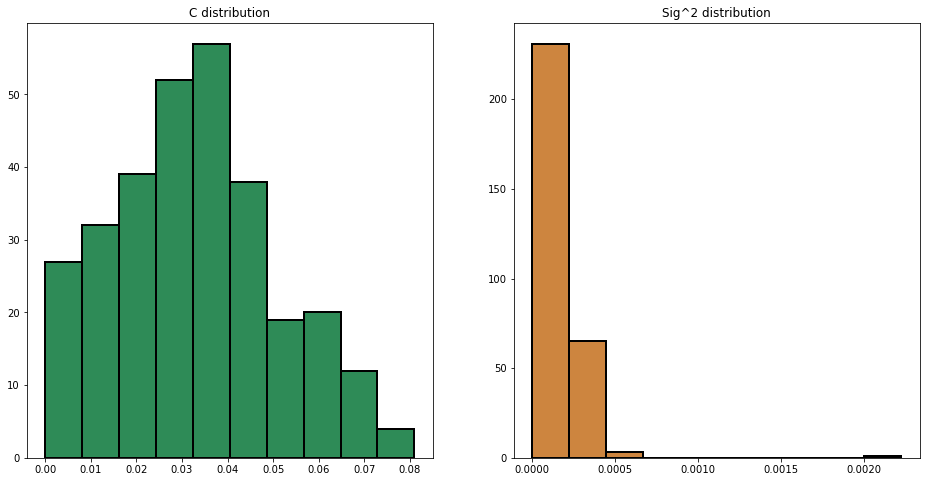

##########################################################################################
Processing example with alpha1: 7.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004549677292499849
Residual Variance: 1.9592588920519456e-05
Flux Lost: 0.01012962733032804
Flux Addition: 0.005205558494941611
psi1(u-f): 0.0004140589078327084
Exceeded Pixels: 394
Sharpness: 3.808681354280703
psi2(grad u): 0.025162520665976462
Total elapsed time: 414.5913882255554 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06708921935427659
Mean min distance between collocation a

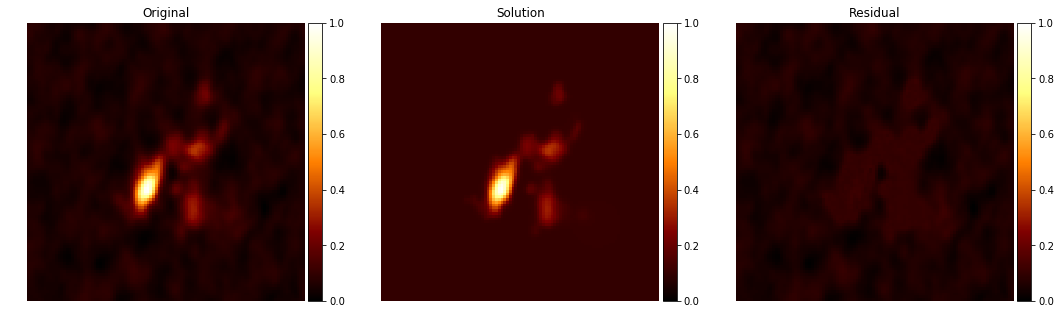

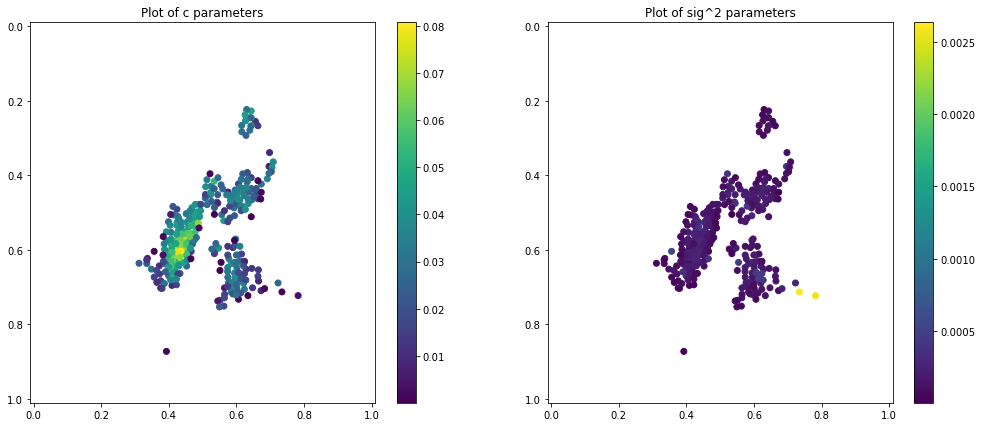

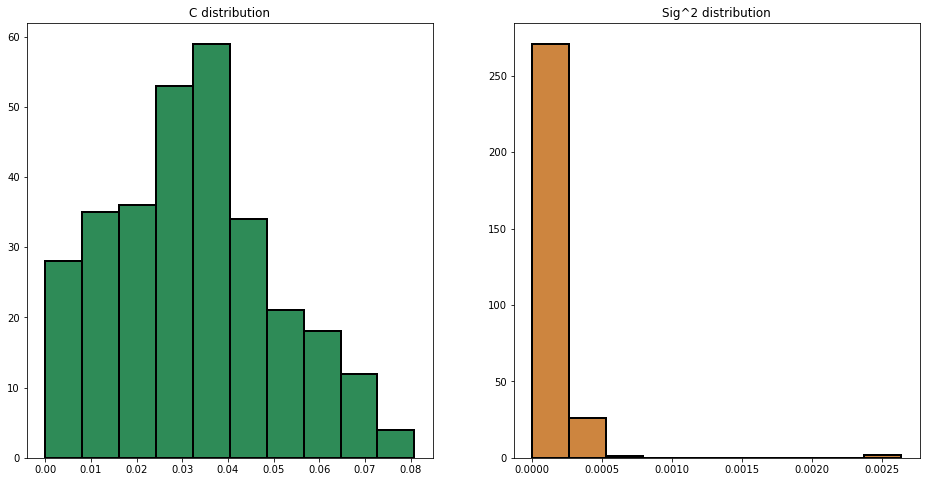

##########################################################################################
Processing example with alpha1: 7.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004579096340197737
Residual Variance: 1.976703980463439e-05
Flux Lost: 0.010287749266585475
Flux Addition: 0.005158640644021954
psi1(u-f): 0.00041516552357409375
Exceeded Pixels: 393
Sharpness: 3.8085223183781753
psi2(grad u): 0.02527608466801073
Total elapsed time: 408.5798659324646 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0664515985133374
Mean min distance between collocation 

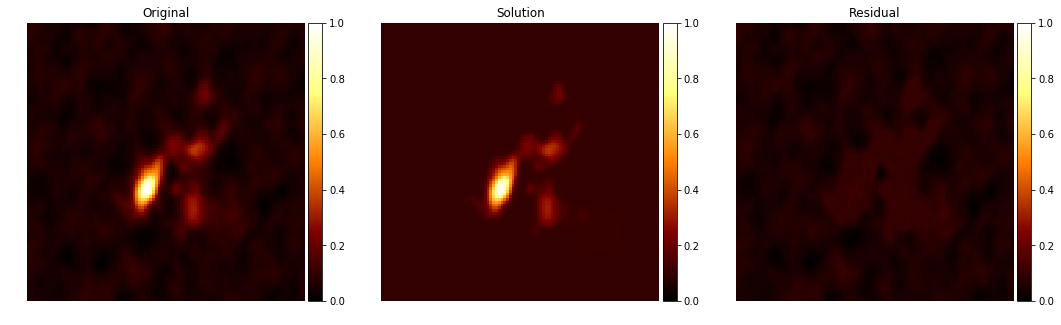

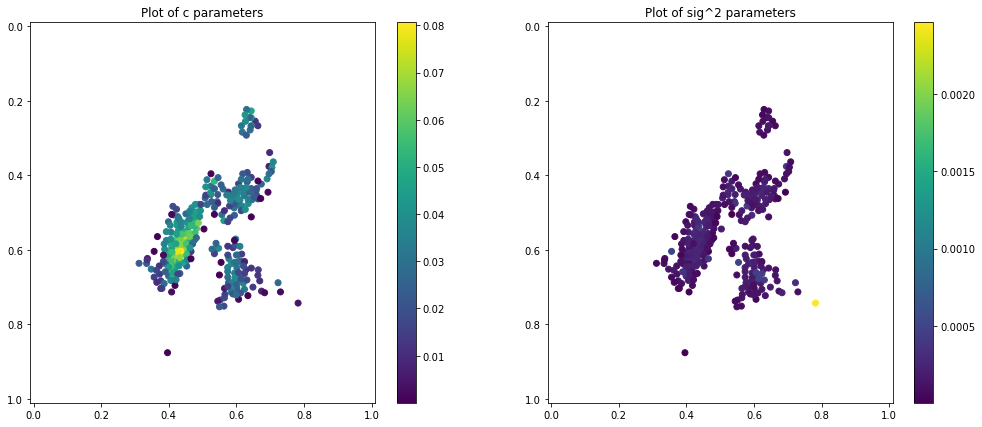

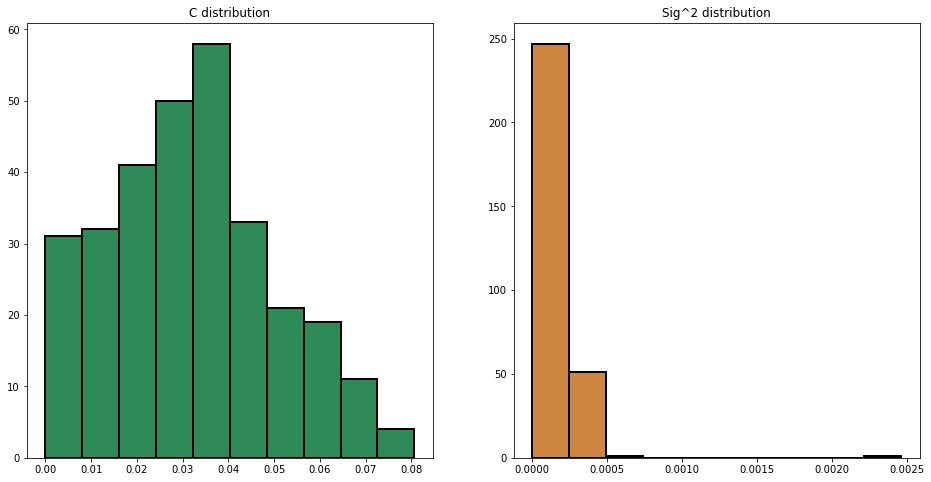

##########################################################################################
Processing example with alpha1: 7.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004597080394826936
Residual Variance: 1.9933356633697743e-05
Flux Lost: 0.010335901437268313
Flux Addition: 0.005209552162315835
psi1(u-f): 0.00043682530688494276
Exceeded Pixels: 393
Sharpness: 3.807483744466008
psi2(grad u): 0.025305510259341343
Total elapsed time: 406.9396286010742 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0665972806370407
Mean min distance between collocation 

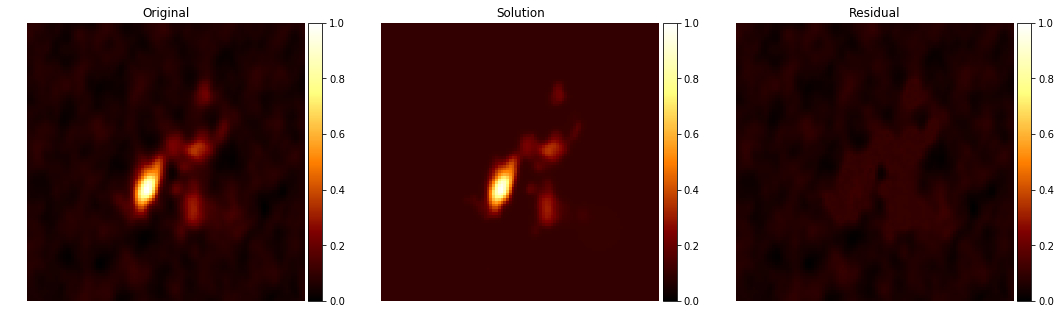

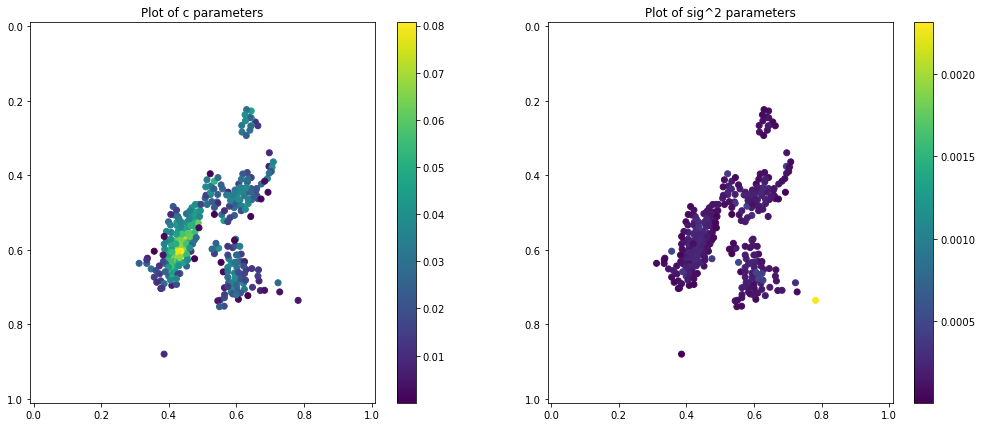

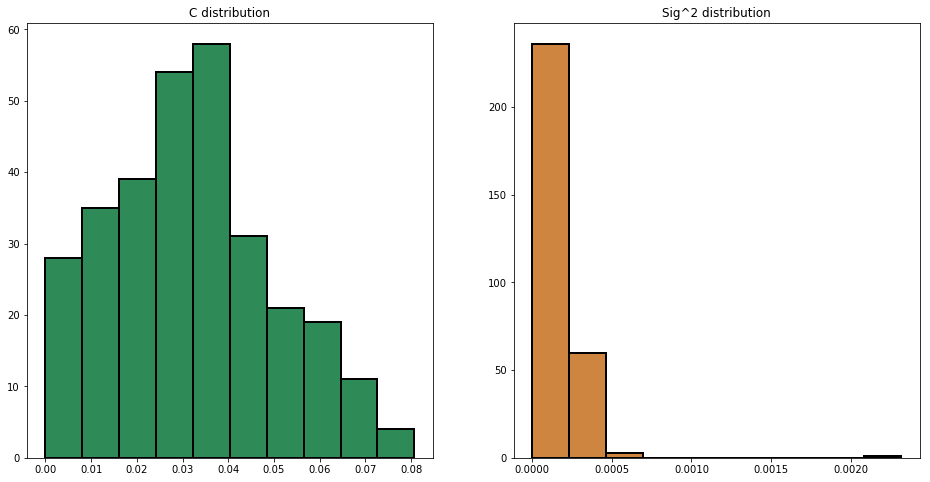

##########################################################################################
Processing example with alpha1: 7.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.004562548207594162
Residual Variance: 1.9646941282086642e-05
Flux Lost: 0.010193690844554884
Flux Addition: 0.005131592576867223
psi1(u-f): 0.00039711914878781934
Exceeded Pixels: 399
Sharpness: 3.810012951103912
psi2(grad u): 0.025123293494580447
Total elapsed time: 405.9669580459595 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06735779142183093
Mean min distance between collocatio

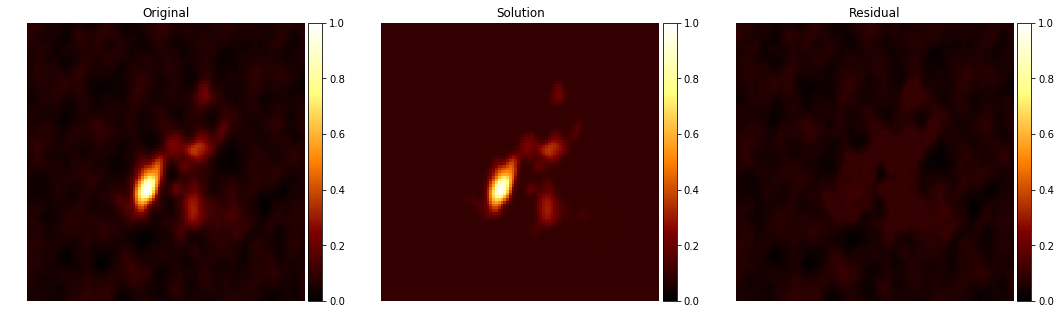

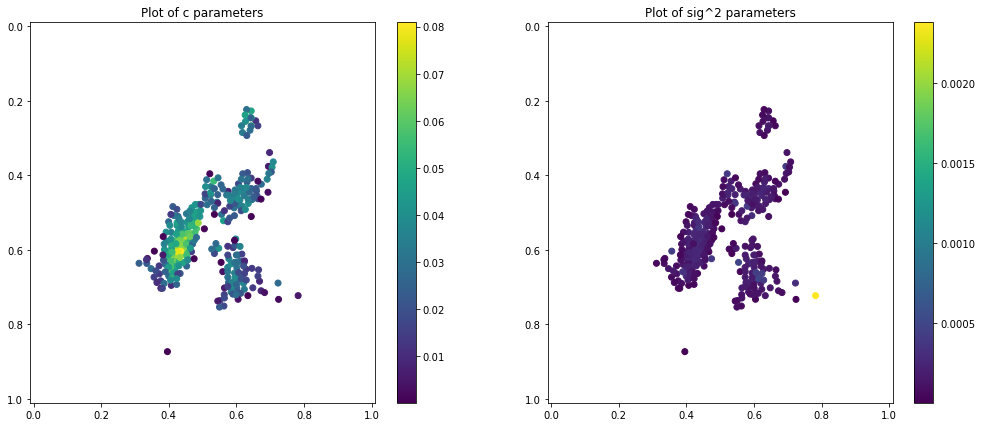

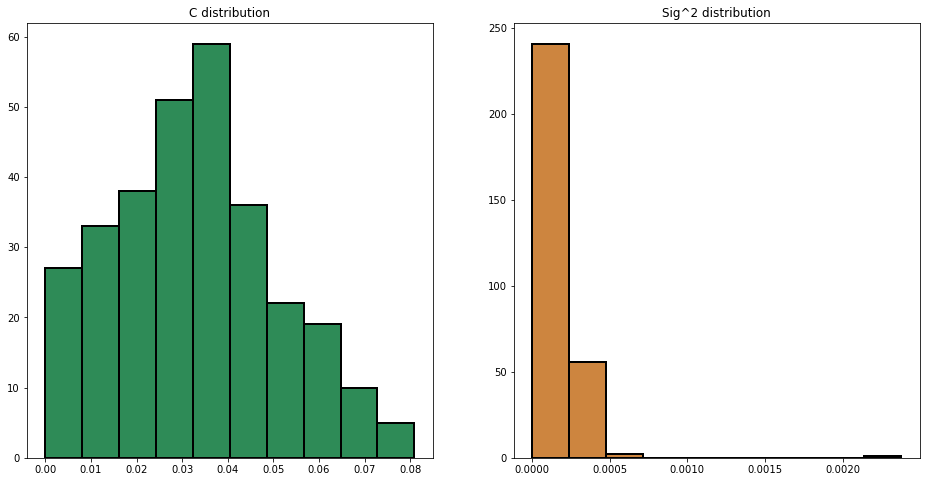

##########################################################################################
Processing example with alpha1: 8.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004650765121907443
Residual Variance: 2.0314373068225884e-05
Flux Lost: 0.010561048596022962
Flux Addition: 0.005193718289515066
psi1(u-f): 0.0004488366647163195
Exceeded Pixels: 386
Sharpness: 3.806832525222156
psi2(grad u): 0.02538138096910282
Total elapsed time: 407.7393252849579 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06651191303308161
Mean min distance between collocation a

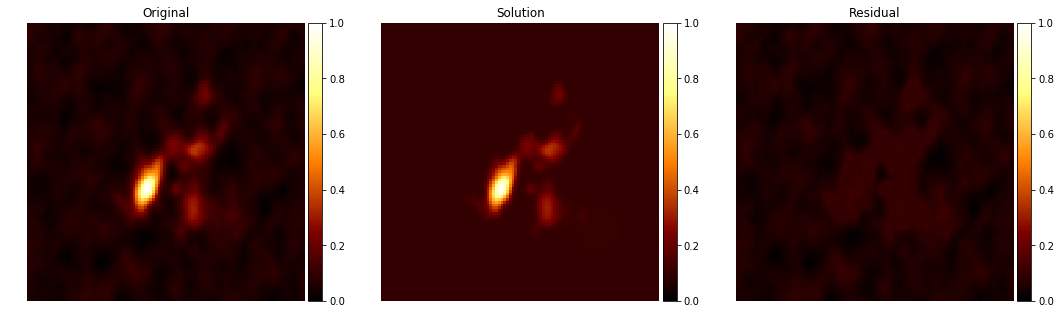

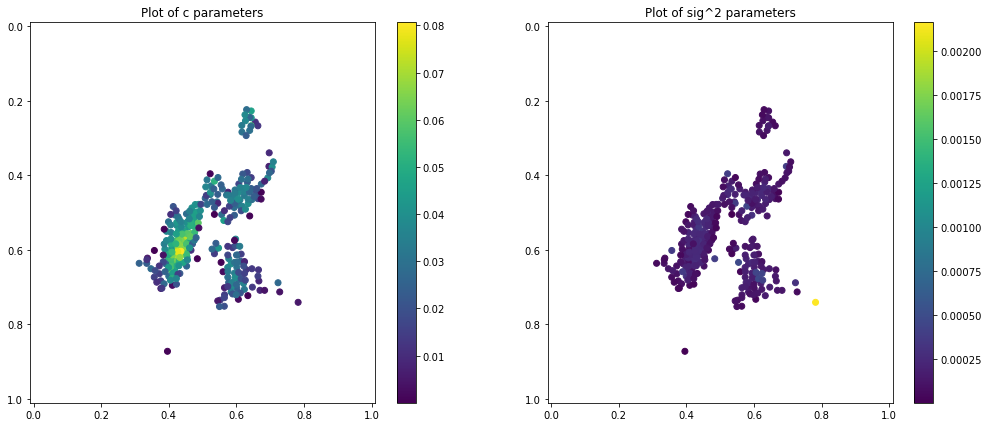

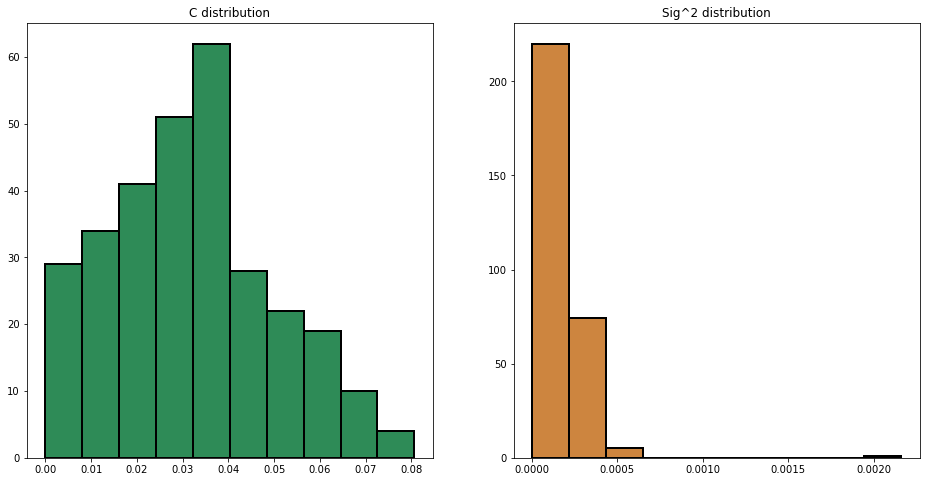

##########################################################################################
Processing example with alpha1: 8.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004718942342172344
Residual Variance: 2.085446416141036e-05
Flux Lost: 0.010784498307721166
Flux Addition: 0.005219401365902807
psi1(u-f): 0.0004781174889056251
Exceeded Pixels: 381
Sharpness: 3.8054713195097776
psi2(grad u): 0.02549509776994253
Total elapsed time: 408.97686767578125 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06637800522608271
Mean min distance between collocation

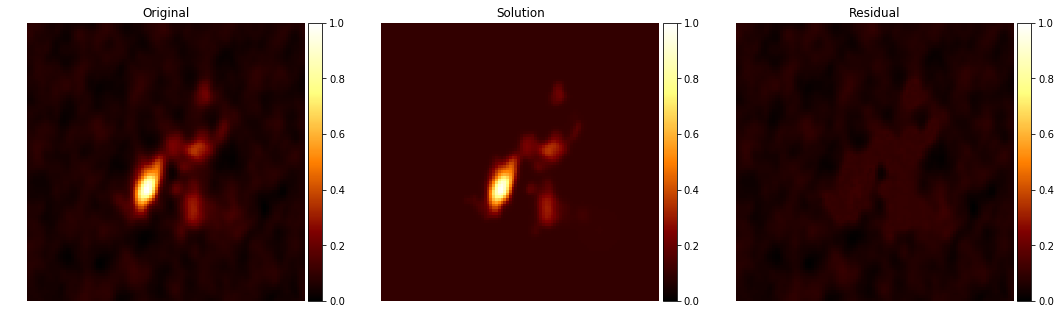

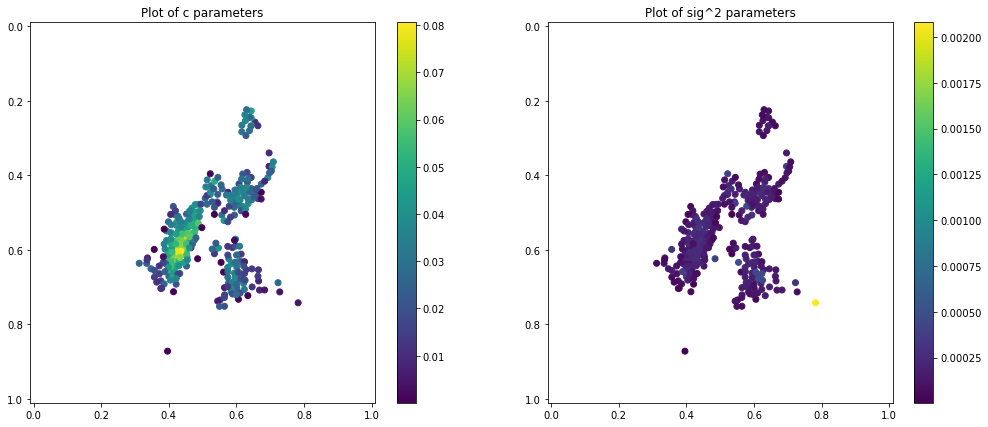

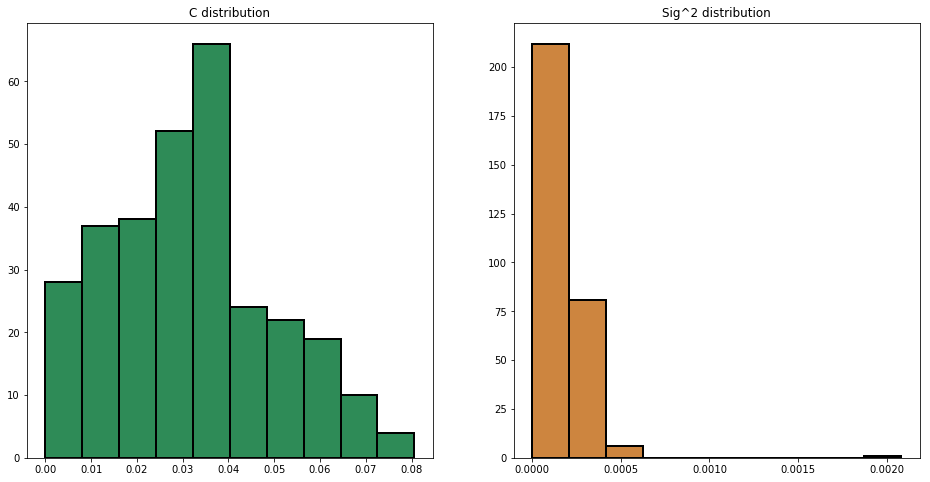

##########################################################################################
Processing example with alpha1: 8.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.0045940400690011405
Residual Variance: 1.984837739902315e-05
Flux Lost: 0.010338791391329831
Flux Addition: 0.005092009546226215
psi1(u-f): 0.00040921705809713227
Exceeded Pixels: 393
Sharpness: 3.8103478013510585
psi2(grad u): 0.025243089357607773
Total elapsed time: 406.4283404350281 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06695977588448748
Mean min distance between collocatio

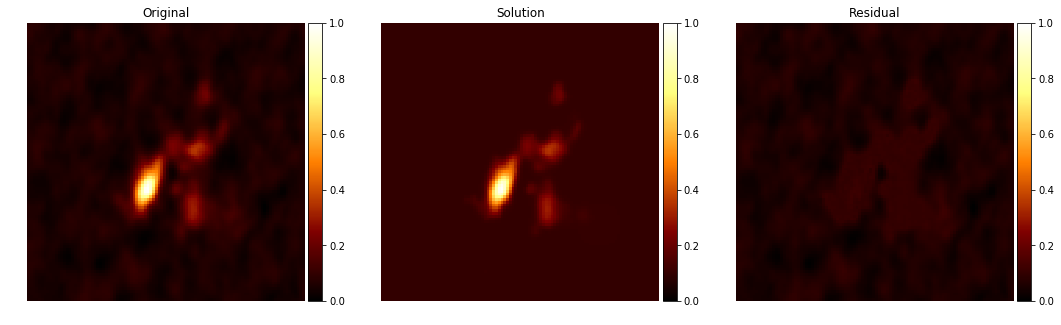

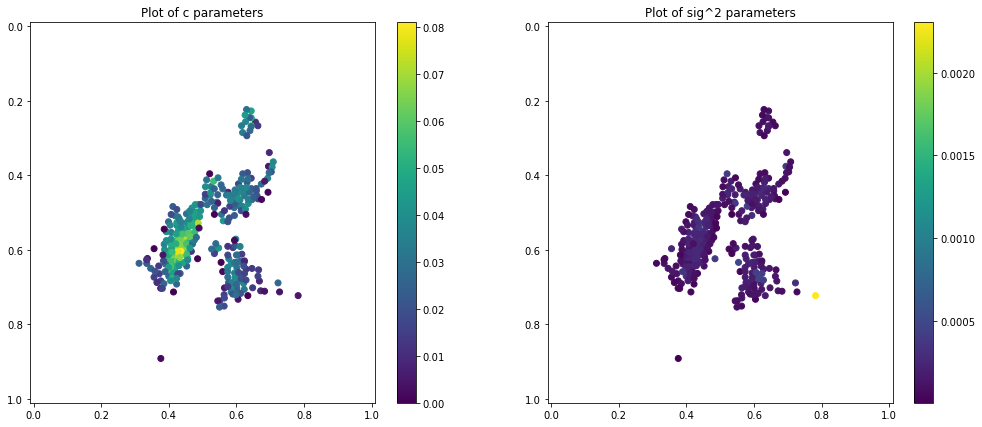

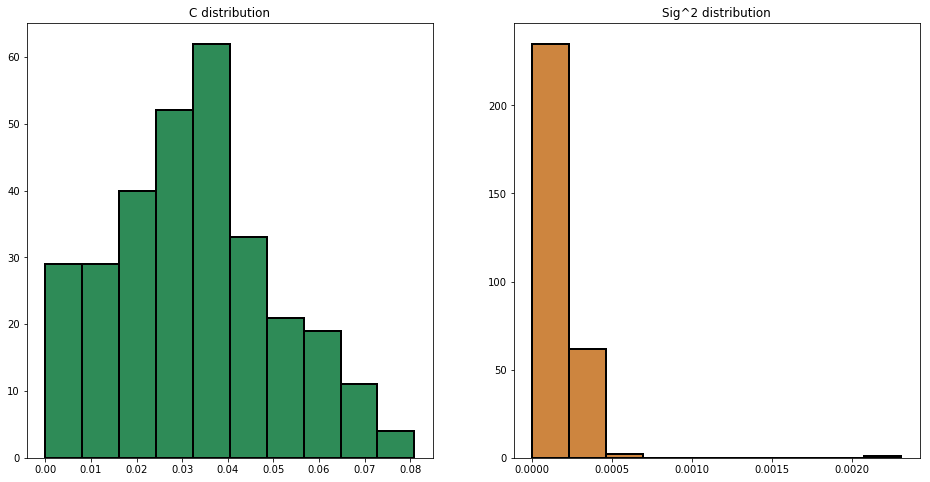

##########################################################################################
Processing example with alpha1: 8.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004708381109908505
Residual Variance: 2.0733659080178007e-05
Flux Lost: 0.010772935952265179
Flux Addition: 0.005166194338526001
psi1(u-f): 0.0004588560708141931
Exceeded Pixels: 383
Sharpness: 3.806695569472397
psi2(grad u): 0.025471481077103945
Total elapsed time: 406.78202176094055 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06659220999917215
Mean min distance between collocatio

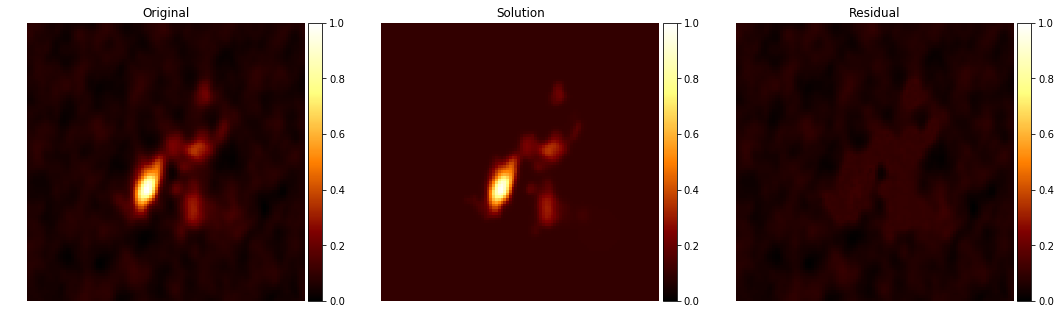

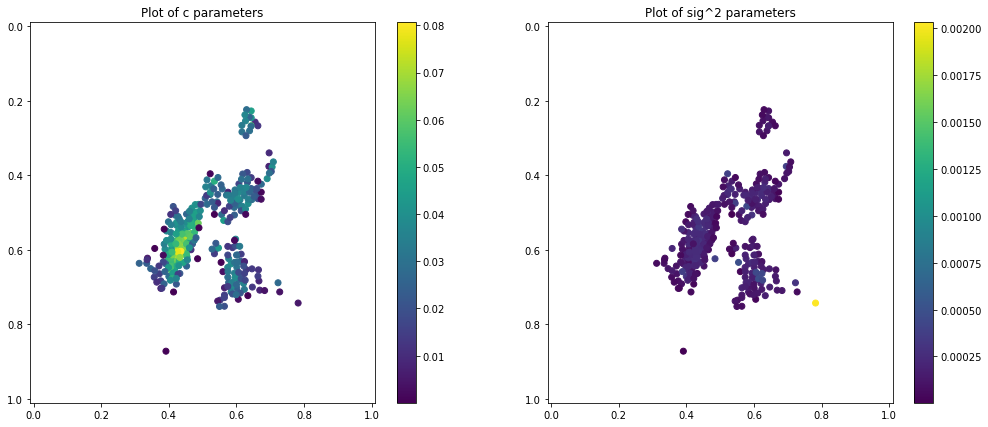

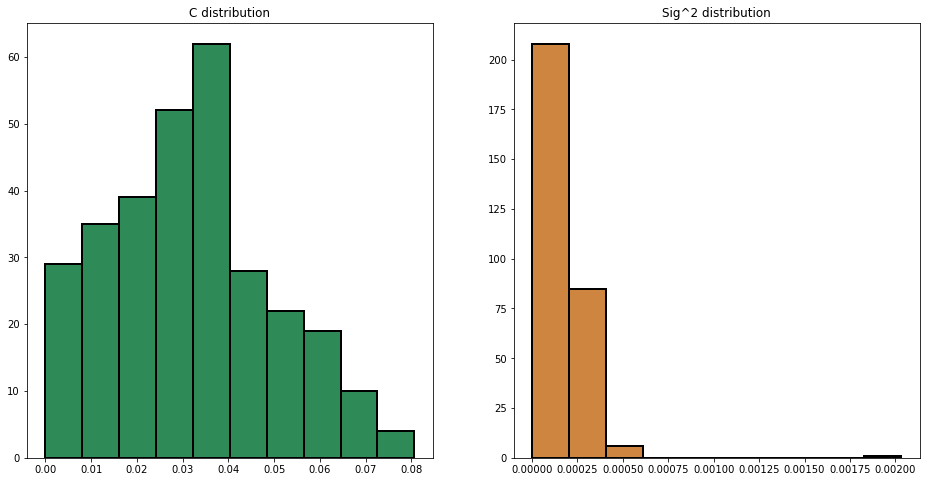

##########################################################################################
Processing example with alpha1: 9.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.00512736533039615
Residual Variance: 2.4674160153479543e-05
Flux Lost: 0.011098639257499253
Flux Addition: 0.005149725305268281
psi1(u-f): 0.0004133555025714382
Exceeded Pixels: 403
Sharpness: 3.811436424141937
psi2(grad u): 0.02499765465940713
Total elapsed time: 403.7961893081665 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.062288537820647666
Mean min distance between collocation a

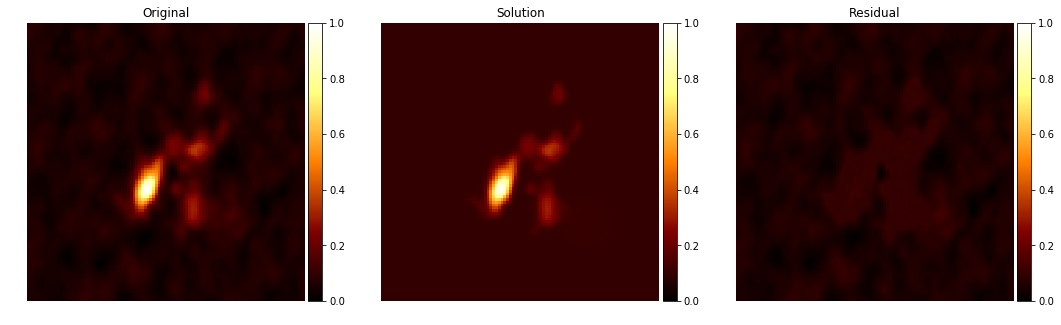

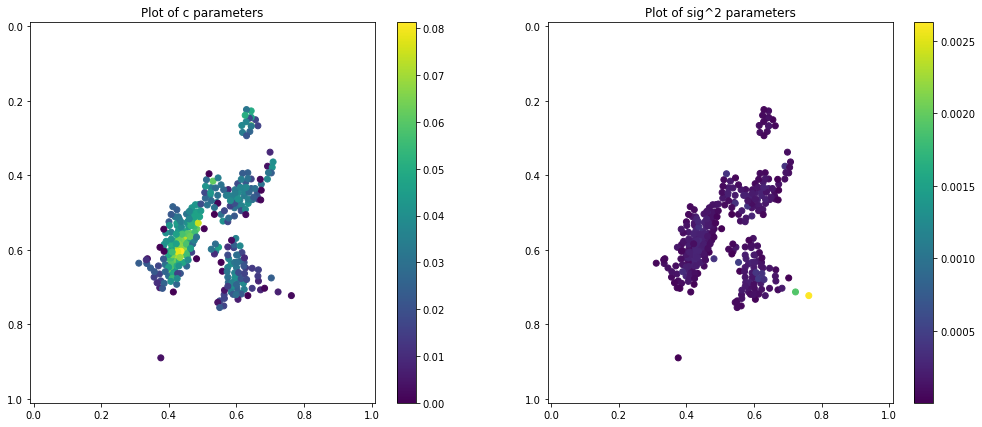

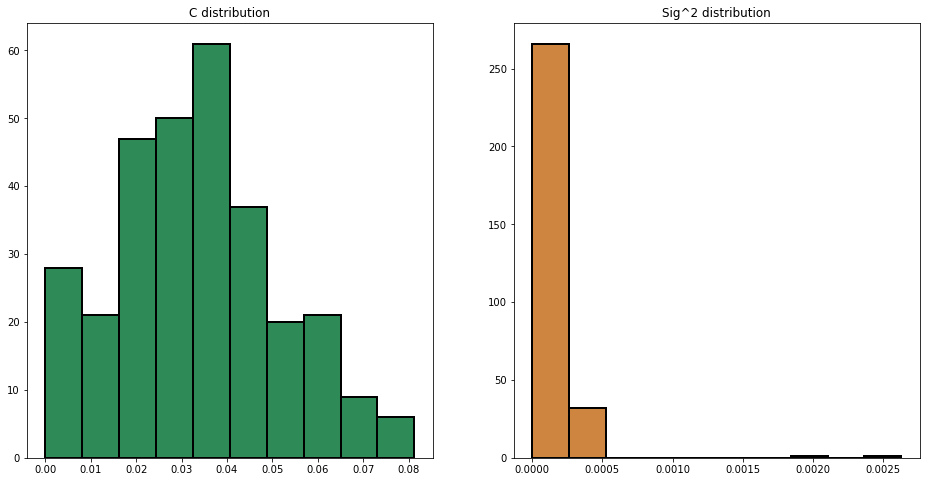

##########################################################################################
Processing example with alpha1: 9.25
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004679814011500438
Residual Variance: 2.0473936765134157e-05
Flux Lost: 0.010696957059019905
Flux Addition: 0.005106786730236318
psi1(u-f): 0.00043270894256894636
Exceeded Pixels: 387
Sharpness: 3.8086168797152724
psi2(grad u): 0.02538417997097783
Total elapsed time: 395.6618857383728 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06743972141218718
Mean min distance between collocatio

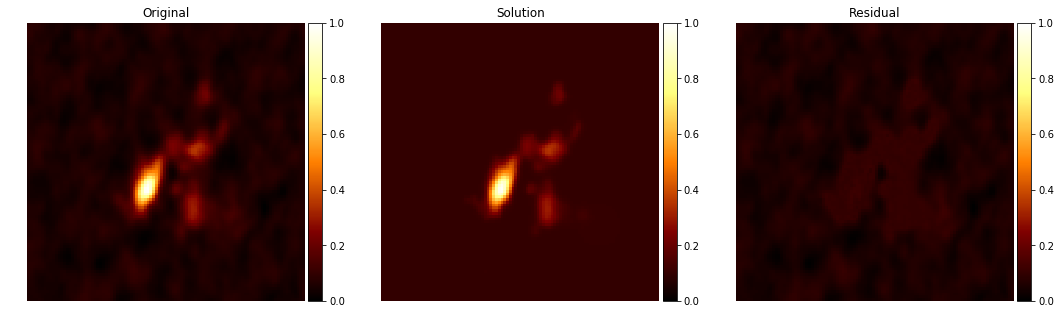

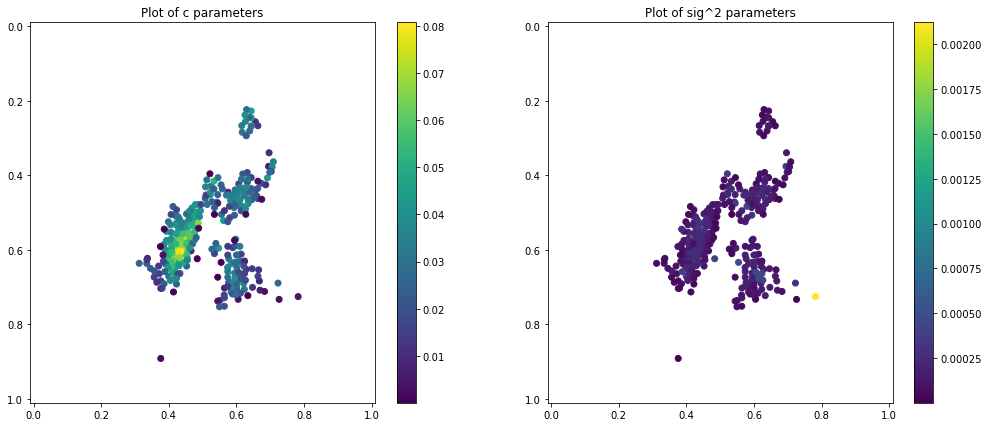

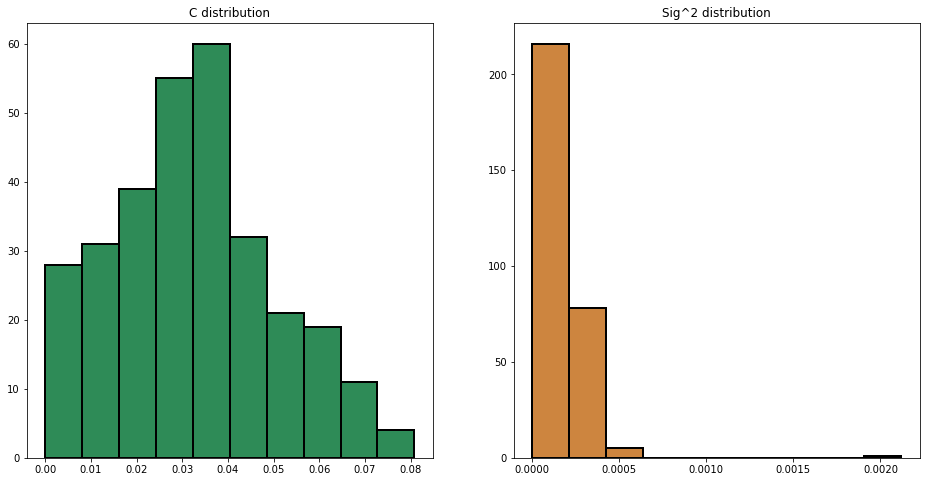

##########################################################################################
Processing example with alpha1: 9.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004708279522067979
Residual Variance: 2.0661315868746863e-05
Flux Lost: 0.010820332465152021
Flux Addition: 0.005075843170852406
psi1(u-f): 0.0004409566363907931
Exceeded Pixels: 386
Sharpness: 3.8076986214096067
psi2(grad u): 0.02542614185279552
Total elapsed time: 387.7859091758728 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06743259834651559
Mean min distance between collocation 

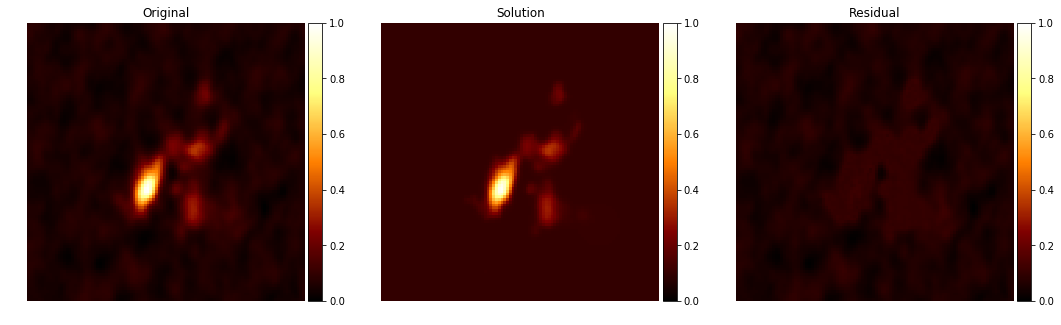

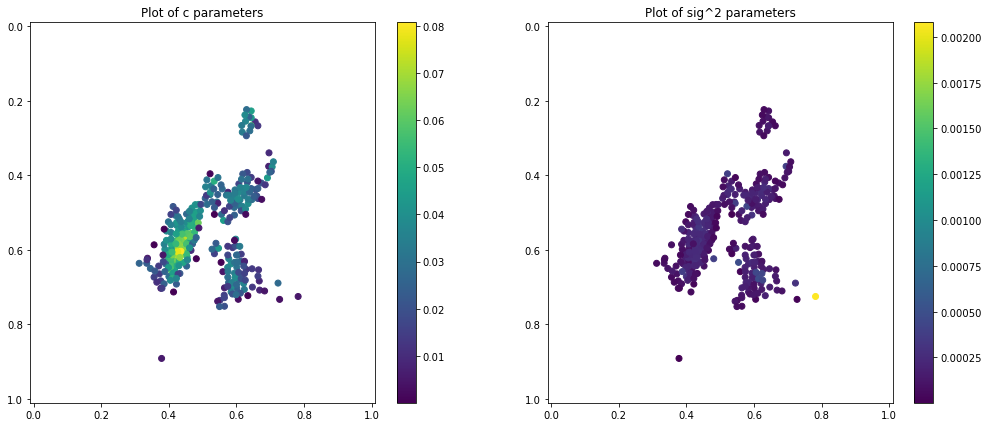

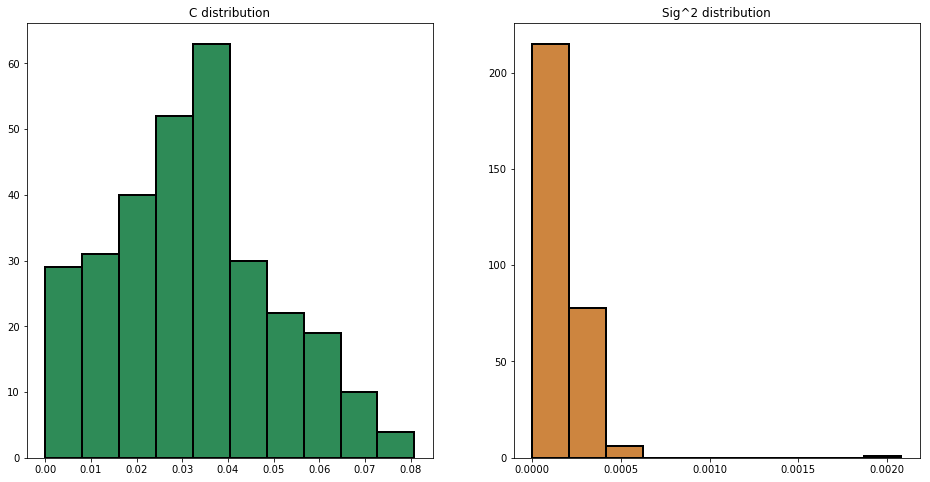

##########################################################################################
Processing example with alpha1: 9.75
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120116

Residual stats:
Residual RMS: 0.004676565841000371
Residual Variance: 2.0375549208428566e-05
Flux Lost: 0.01071869334566545
Flux Addition: 0.0049968619687895
psi1(u-f): 0.0004178628722548058
Exceeded Pixels: 382
Sharpness: 3.8099942435544154
psi2(grad u): 0.025344448940329944
Total elapsed time: 390.2469069957733 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06742499830373194
Mean min distance between collocation a

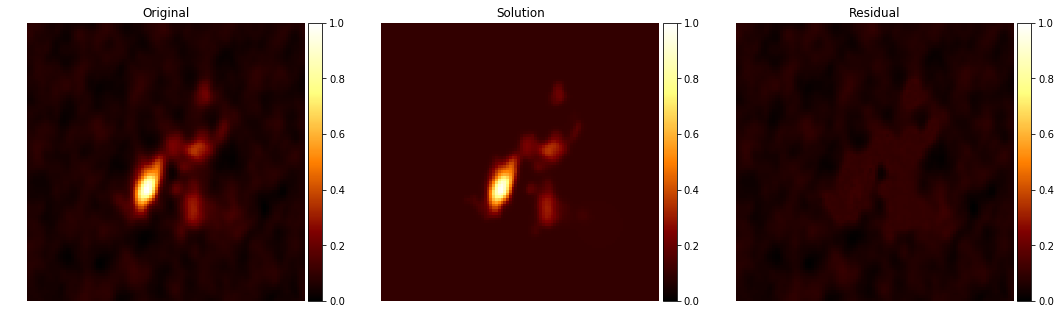

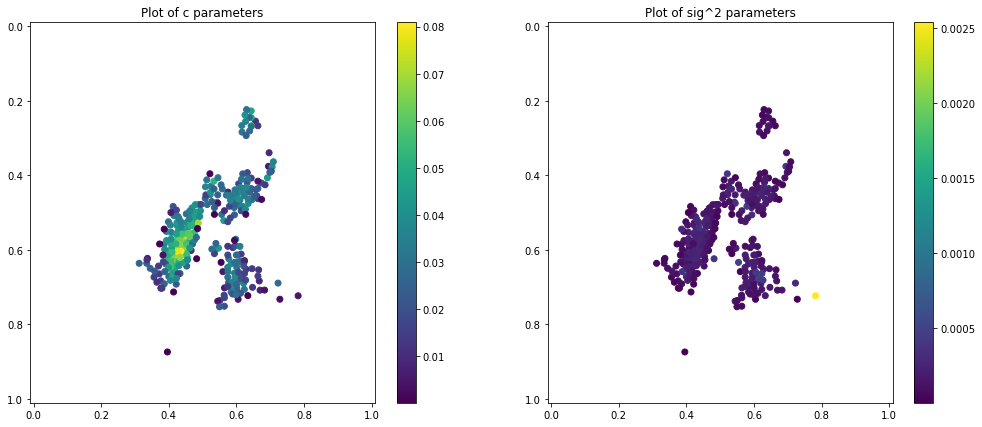

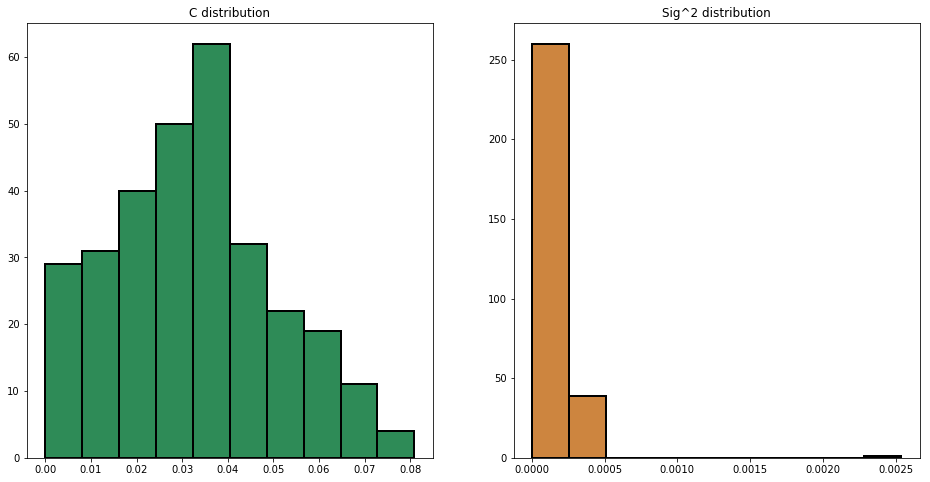

##########################################################################################
Processing example with alpha1: 10.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004734889820784152
Residual Variance: 2.080067550501907e-05
Flux Lost: 0.010977757789631068
Flux Addition: 0.005023707893045255
psi1(u-f): 0.0004490987373120199
Exceeded Pixels: 377
Sharpness: 3.807556941010642
psi2(grad u): 0.025493432681975244
Total elapsed time: 389.0709340572357 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06687827479054986
Mean min distance between collocation 

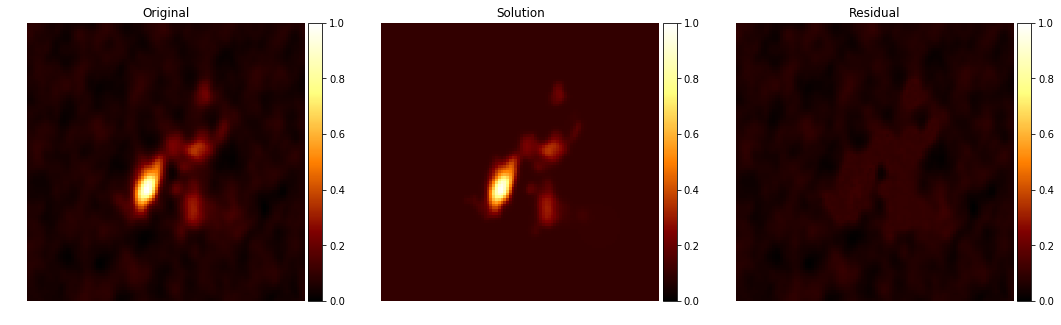

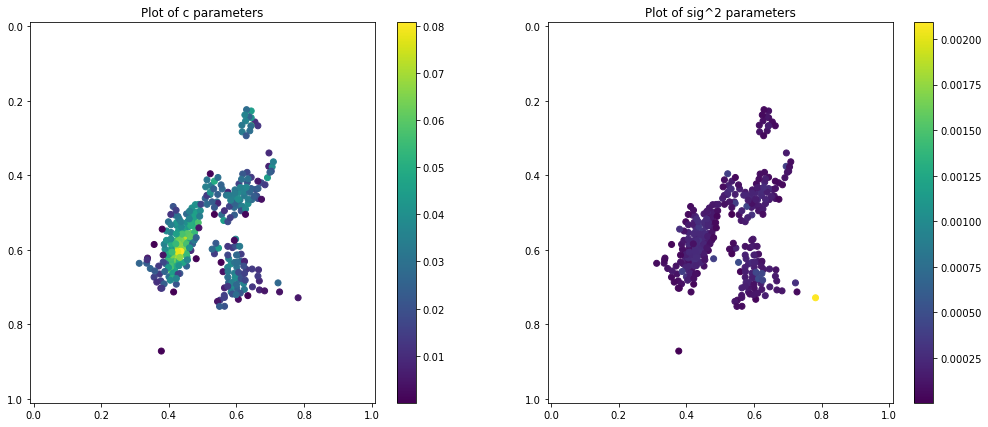

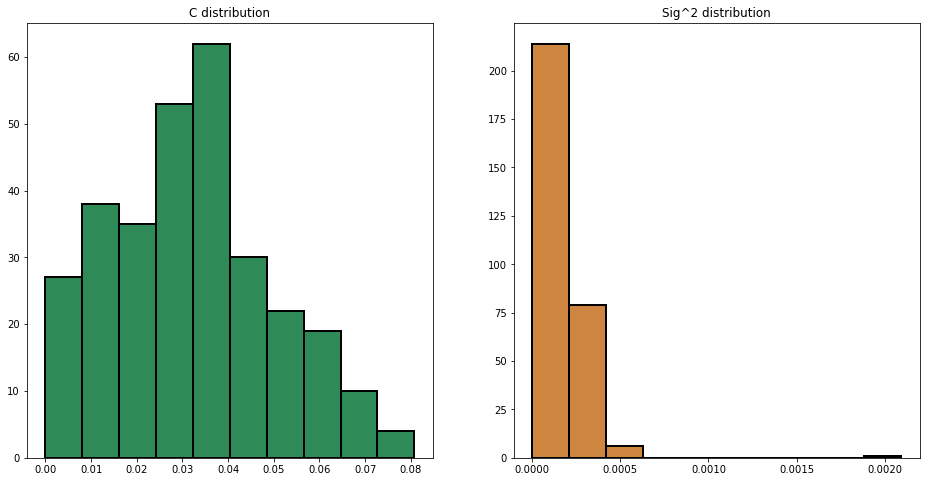

In [6]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha1: {0}'.format(elm.a))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp02_alpha1_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

In [8]:
alphas = [elm.a for elm in elm_list]
r_stats = [elm.get_residual_stats() for elm in elm_list]
variance = [var for (var,_,_,_) in r_stats]
entropy = [entr for (_,entr,_,_) in r_stats]
rms = [rms for (_,_,rms,_) in r_stats]
flux = [flux for (_,_,_,flux) in r_stats]

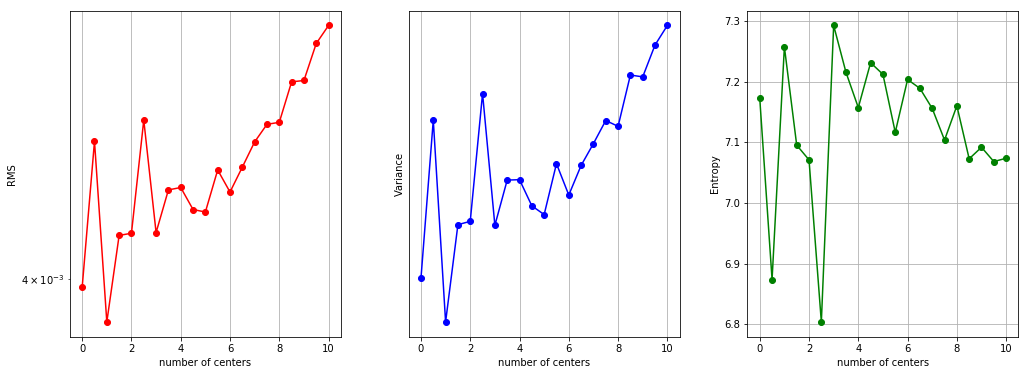

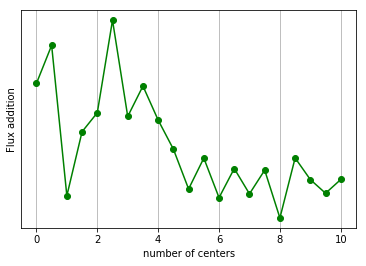

In [9]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
plt.semilogy(alphas, rms, 'ro-')
#plt.title('RMS')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')

ax = plt.subplot(1,3,2)
plt.semilogy(alphas, variance, 'bo-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.subplot(1,3,3)
plt.plot(alphas, entropy, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')

plt.show()


plt.semilogy(alphas, flux, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux addition')
plt.show()

## `Case 2 `:   $\alpha_2 = [10^{-10},10^0]$ 

In [ ]:
elm_list = list()
#alpha2 = np.array([10**-n for n in range(0,11)])
alpha2 = np.linspace(1e-5, 1e-3, 20)

for a2 in alpha2:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 300
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*Nc)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=3.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0, lamb1=1., b=a2, lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

##########################################################################################
Processing example with alpha2: 1e-05
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 19231

Residual stats:
Residual RMS: 0.007233758880073422
Residual Variance: 5.2056754188837715e-05
Flux Lost: 0.011174933032596958
Flux Addition: 0.013609095975289436
psi1(u-f): 0.0034865562875923276
Exceeded Pixels: 516
Sharpness: 3.7255973162296003
psi2(grad u): 0.024475539174985857
Total elapsed time: 100.90311455726624 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.026150173289862525
Mean min distance be

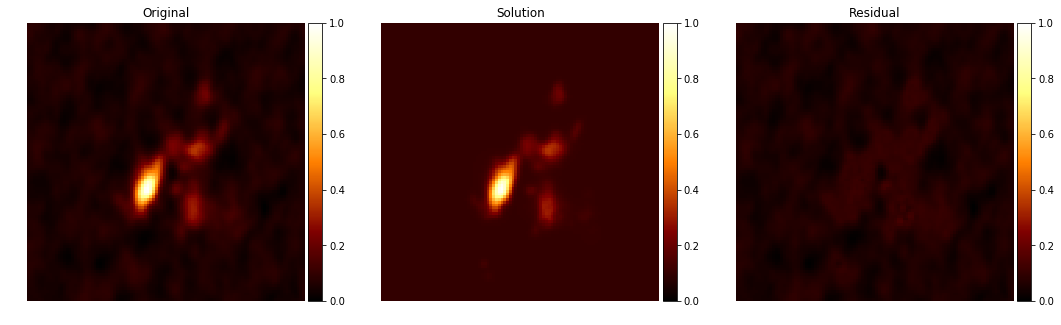

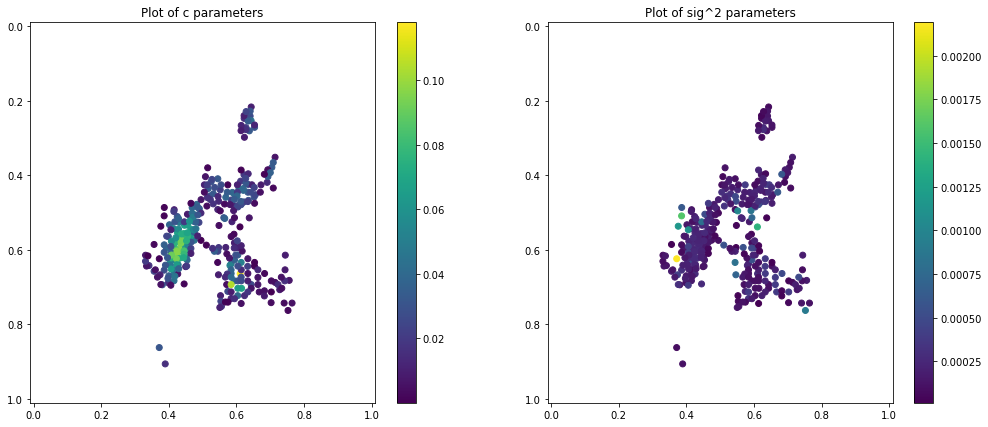

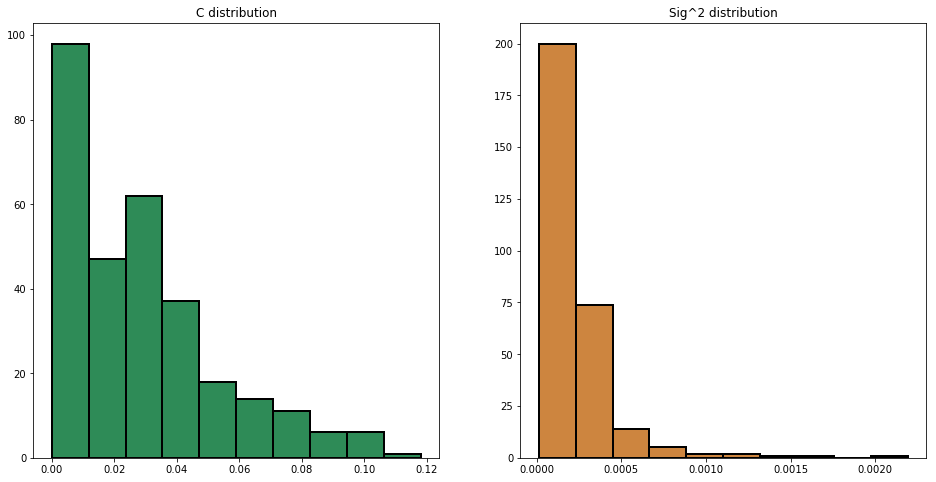

##########################################################################################
Processing example with alpha2: 6.210526315789474e-05
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 16827

Residual stats:
Residual RMS: 0.009450526643926638
Residual Variance: 8.926983068316821e-05
Flux Lost: 0.01295160885544555
Flux Addition: 0.013917833572043507
psi1(u-f): 0.009239951085513533
Exceeded Pixels: 481
Sharpness: 3.7135156416877706
psi2(grad u): 0.025090673982250414
Total elapsed time: 84.71376848220825 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02680765650705721
Mean min 

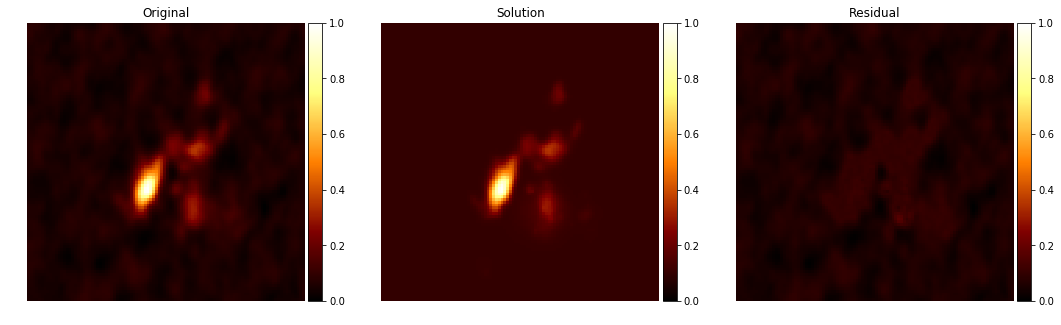

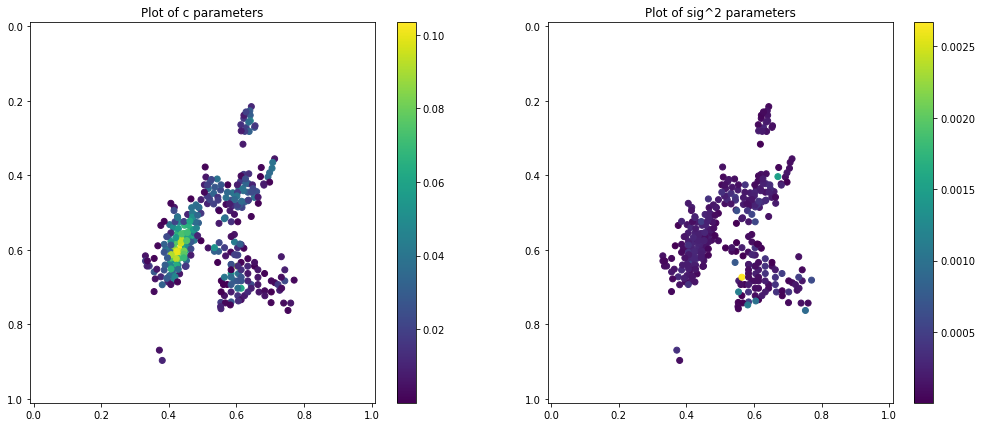

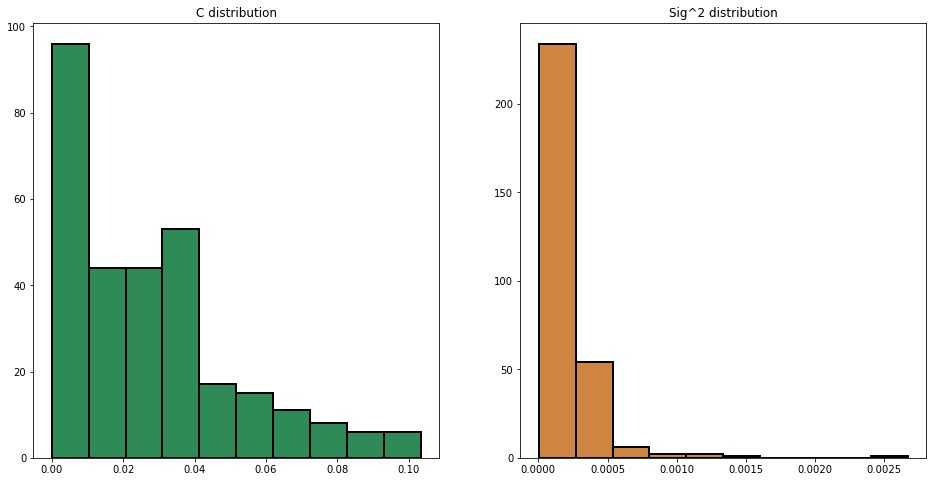

##########################################################################################
Processing example with alpha2: 0.00011421052631578947
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120117

Residual stats:
Residual RMS: 0.008980792631492885
Residual Variance: 8.058354749343916e-05
Flux Lost: 0.011420282112271706
Flux Addition: 0.012668113423506011
psi1(u-f): 0.0158277626405099
Exceeded Pixels: 469
Sharpness: 3.7411704739459894
psi2(grad u): 0.024751829843835
Total elapsed time: 479.42143988609314 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02856203985445939
Mean min distance betwee

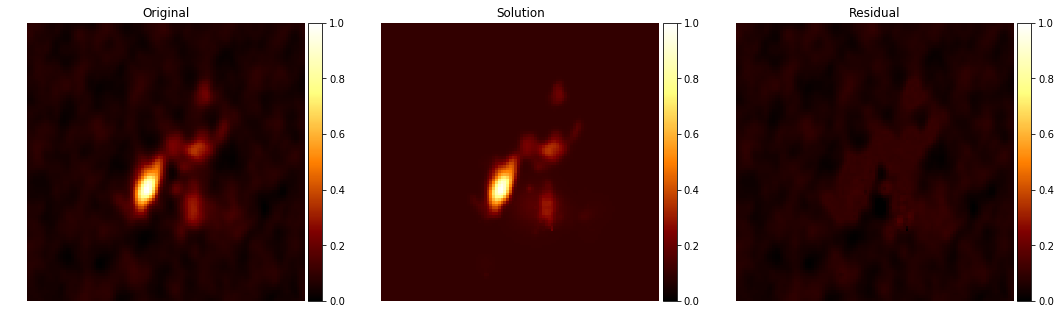

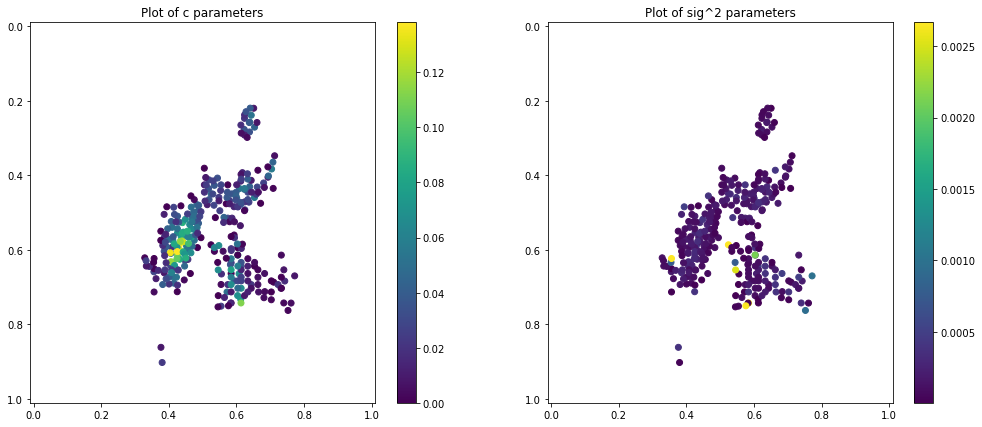

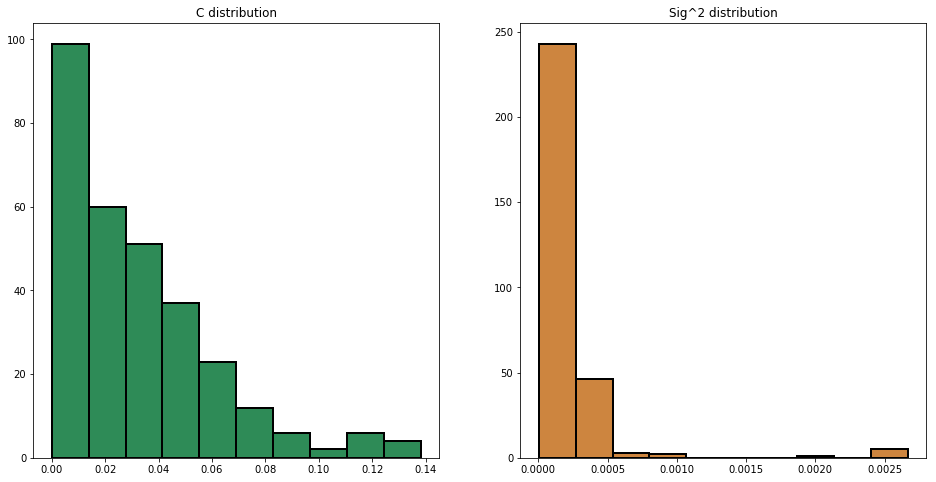

##########################################################################################
Processing example with alpha2: 0.0001663157894736842
##########################################################################################



In [ ]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha2: {0}'.format(elm.b))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp02_alpha2_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()